# Customers Churn


Customers churn refers to the amount of customers of a given company that stop using products or services during a certain time frame. One can calculate the churn rate by dividing the number of customers lost during that time period -- say a quarter -- by the number of existing customers at the beginning of that time period. For example, starting the quarter with 400 customers and ending with 380, the churn rate is 5% because 5% of your customers dropped off.

For Business Intelligence, this is one of the most important metrics to look at since loosing clients now-a-days is very easy, compared to retain the existing ones. Companies should aim for a churn rate that is as close to 0% as possible. In order to do this, the company has to be on top of its churn rate at all times and treat it as a top priority.

3 Ways to Reduce Customer Churn
1. Focus the attention on the best customers.
Rather than simply focusing on offering incentives to customers who are considering churning, it could be even more beneficial to pool the resources into the loyal, profitable customers.

2. Analyze churn as it occurs.
Use the churned customers as a means of understanding why customers are leaving. Analyze how and when churn occurs in a customer's lifetime with the company, and use that data to put into place preemptive measures.

3. Show the customers that you care.
Instead of waiting to connect with the customers until they reach out to you, try a more proactive approach. Communicate with them all the perks you offer and show them you care about their experience, and they'll be sure to stick around.


In this project, I will use several tools from Survival Analysis to focus on a customer retention program from the Telco company (https://www.telco.com/company-profile). Each row represents a customer, each column contains customer's attributes described on the column Metadata. 

The data set includes information about:
1. CustomerID: A unique ID that identifies each customer.
2. Gender: The customer’s gender: Male, Female
3. Age: The customer’s current age, in years, at the time the fiscal quarter ended.
4. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
5. Married (Partner): Indicates if the customer is married: Yes, No
6. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
7. Number of Dependents: Indicates the number of dependents that live with the customer.
8. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
9. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
10. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
11. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
12. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
13. Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
14. Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
15. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
16. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
17. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
18. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
19. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
20. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
21. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
22. Tenure: Indicates the total amount of months that the customer has been with the company.
23. Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

## Loading the basic modules

In [1]:
import config
import load_data as ld
import data_preprocessing as dp

## Loading the data

In [2]:
training = ld.load_data(config.TRAINING,config.ID_VAR)
training

Data loaded correctly.


Gender SeniorCitizen Partner Dependents  Tenure PhoneService  \
Client                                                                     
6507-DTJZV    Male            No      No        Yes      13          Yes   
7274-CGTOD    Male            No      No         No      62           No   
7593-XFKDI    Male            No      No         No       1          Yes   
2405-LBMUW  Female            No     Yes        Yes      61           No   
6419-ZTTLE    Male           Yes     Yes         No      23          Yes   
...            ...           ...     ...        ...     ...          ...   
1468-DEFNC    Male           Yes     Yes        Yes      64          Yes   
5748-RNCJT    Male            No      No         No      69          Yes   
3331-HQDTW  Female            No      No         No      34          Yes   
1555-HAPSU  Female            No     Yes        Yes      71          Yes   
8705-WZCYL    Male            No      No         No       1          Yes   

               MultipleLines InternetService       OnlineSecurity  \
Client                                                              
6507-DTJZV                No             DSL                   No   
7274-CGTOD  No phone service             DSL                  Yes   
7593-XFKDI                No             DSL                   No   
2405-LBMUW  No phone service             DSL                  Yes   
6419-ZTTLE                No              No  No internet service   
...                      ...             ...                  ...   
1468-DEFNC               Yes              No  No internet service   
5748-RNCJT               Yes     Fiber optic                   No   
3331-HQDTW               Yes     Fiber optic                  Yes   
1555-HAPSU               Yes              No  No internet service   
8705-WZCYL                No             DSL                   No   

                   OnlineBackup     DeviceProtection          TechSupport  \
Client                                                                      
6507-DTJZV                   No                   No                   No   
7274-CGTOD                  Yes                  Yes                  Yes   
7593-XFKDI                   No                   No                   No   
2405-LBMUW                  Yes                   No                  Yes   
6419-ZTTLE  No internet service  No internet service  No internet service   
...                         ...                  ...                  ...   
1468-DEFNC  No internet service  No internet service  No internet service   
5748-RNCJT                   No                  Yes                  Yes   
3331-HQDTW                  Yes                  Yes                   No   
1555-HAPSU  No internet service  No internet service  No internet service   
8705-WZCYL                   No                   No                   No   

                    StreamingTV      StreamingMovies        Contract  \
Client                                                                 
6507-DTJZV                  Yes                  Yes  Month-to-month   
7274-CGTOD                   No                   No        Two year   
7593-XFKDI                   No                   No  Month-to-month   
2405-LBMUW                   No                  Yes        One year   
6419-ZTTLE  No internet service  No internet service        One year   
...                         ...                  ...             ...   
1468-DEFNC  No internet service  No internet service        Two year   
5748-RNCJT                  Yes                  Yes        Two year   
3331-HQDTW                  Yes                  Yes  Month-to-month   
1555-HAPSU  No internet service  No internet service        Two year   
8705-WZCYL                   No                   No  Month-to-month   

           PaperlessBilling              PaymentMethod  MonthlyCharges  \
Client                                                                   
6507-DTJZV               No    Credit 

## Reduce in-memory size

I will use a pre-defined function to reduce the usage of memory while handling this amount of data!

In [3]:
training = dp.reduce_mem_usage(training)
training

Memory usage of dataframe is 0.79 MB --> 0.14 MB (Decreased by 81.9%)


Gender SeniorCitizen Partner Dependents  Tenure PhoneService  \
Client                                                                     
6507-DTJZV    Male            No      No        Yes      13          Yes   
7274-CGTOD    Male            No      No         No      62           No   
7593-XFKDI    Male            No      No         No       1          Yes   
2405-LBMUW  Female            No     Yes        Yes      61           No   
6419-ZTTLE    Male           Yes     Yes         No      23          Yes   
...            ...           ...     ...        ...     ...          ...   
1468-DEFNC    Male           Yes     Yes        Yes      64          Yes   
5748-RNCJT    Male            No      No         No      69          Yes   
3331-HQDTW  Female            No      No         No      34          Yes   
1555-HAPSU  Female            No     Yes        Yes      71          Yes   
8705-WZCYL    Male            No      No         No       1          Yes   

               MultipleLines InternetService       OnlineSecurity  \
Client                                                              
6507-DTJZV                No             DSL                   No   
7274-CGTOD  No phone service             DSL                  Yes   
7593-XFKDI                No             DSL                   No   
2405-LBMUW  No phone service             DSL                  Yes   
6419-ZTTLE                No              No  No internet service   
...                      ...             ...                  ...   
1468-DEFNC               Yes              No  No internet service   
5748-RNCJT               Yes     Fiber optic                   No   
3331-HQDTW               Yes     Fiber optic                  Yes   
1555-HAPSU               Yes              No  No internet service   
8705-WZCYL                No             DSL                   No   

                   OnlineBackup     DeviceProtection          TechSupport  \
Client                                                                      
6507-DTJZV                   No                   No                   No   
7274-CGTOD                  Yes                  Yes                  Yes   
7593-XFKDI                   No                   No                   No   
2405-LBMUW                  Yes                   No                  Yes   
6419-ZTTLE  No internet service  No internet service  No internet service   
...                         ...                  ...                  ...   
1468-DEFNC  No internet service  No internet service  No internet service   
5748-RNCJT                   No                  Yes                  Yes   
3331-HQDTW                  Yes                  Yes                   No   
1555-HAPSU  No internet service  No internet service  No internet service   
8705-WZCYL                   No                   No                   No   

                    StreamingTV      StreamingMovies        Contract  \
Client                                                                 
6507-DTJZV                  Yes                  Yes  Month-to-month   
7274-CGTOD                   No                   No        Two year   
7593-XFKDI                   No                   No  Month-to-month   
2405-LBMUW                   No                  Yes        One year   
6419-ZTTLE  No internet service  No internet service        One year   
...                         ...                  ...             ...   
1468-DEFNC  No internet service  No internet service        Two year   
5748-RNCJT                  Yes                  Yes        Two year   
3331-HQDTW                  Yes                  Yes  Month-to-month   
1555-HAPSU  No internet service  No internet service        Two year   
8705-WZCYL                   No                   No  Month-to-month   

           PaperlessBilling              PaymentMethod  MonthlyCharges  \
Client                                                                   
6507-DTJZV               No    Credit 

I managed to reduce by 81.9% the memory usage.

## Delete duplicated rows

I will delete duplicated rows as they are unuseful

In [4]:
training = dp.duplicated_data(training)
training

Removed  13  duplicate rows


Gender SeniorCitizen Partner Dependents  Tenure PhoneService  \
Client                                                                     
6507-DTJZV    Male            No      No        Yes      13          Yes   
7274-CGTOD    Male            No      No         No      62           No   
7593-XFKDI    Male            No      No         No       1          Yes   
2405-LBMUW  Female            No     Yes        Yes      61           No   
6419-ZTTLE    Male           Yes     Yes         No      23          Yes   
...            ...           ...     ...        ...     ...          ...   
1468-DEFNC    Male           Yes     Yes        Yes      64          Yes   
5748-RNCJT    Male            No      No         No      69          Yes   
3331-HQDTW  Female            No      No         No      34          Yes   
1555-HAPSU  Female            No     Yes        Yes      71          Yes   
8705-WZCYL    Male            No      No         No       1          Yes   

               MultipleLines InternetService       OnlineSecurity  \
Client                                                              
6507-DTJZV                No             DSL                   No   
7274-CGTOD  No phone service             DSL                  Yes   
7593-XFKDI                No             DSL                   No   
2405-LBMUW  No phone service             DSL                  Yes   
6419-ZTTLE                No              No  No internet service   
...                      ...             ...                  ...   
1468-DEFNC               Yes              No  No internet service   
5748-RNCJT               Yes     Fiber optic                   No   
3331-HQDTW               Yes     Fiber optic                  Yes   
1555-HAPSU               Yes              No  No internet service   
8705-WZCYL                No             DSL                   No   

                   OnlineBackup     DeviceProtection          TechSupport  \
Client                                                                      
6507-DTJZV                   No                   No                   No   
7274-CGTOD                  Yes                  Yes                  Yes   
7593-XFKDI                   No                   No                   No   
2405-LBMUW                  Yes                   No                  Yes   
6419-ZTTLE  No internet service  No internet service  No internet service   
...                         ...                  ...                  ...   
1468-DEFNC  No internet service  No internet service  No internet service   
5748-RNCJT                   No                  Yes                  Yes   
3331-HQDTW                  Yes                  Yes                   No   
1555-HAPSU  No internet service  No internet service  No internet service   
8705-WZCYL                   No                   No                   No   

                    StreamingTV      StreamingMovies        Contract  \
Client                                                                 
6507-DTJZV                  Yes                  Yes  Month-to-month   
7274-CGTOD                   No                   No        Two year   
7593-XFKDI                   No                   No  Month-to-month   
2405-LBMUW                   No                  Yes        One year   
6419-ZTTLE  No internet service  No internet service        One year   
...                         ...                  ...             ...   
1468-DEFNC  No internet service  No internet service        Two year   
5748-RNCJT                  Yes                  Yes        Two year   
3331-HQDTW                  Yes                  Yes  Month-to-month   
1555-HAPSU  No internet service  No internet service        Two year   
8705-WZCYL                   No                   No  Month-to-month   

           PaperlessBilling              PaymentMethod  MonthlyCharges  \
Client                                                                   
6507-DTJZV               No    Credit 

## Quick Statistical Review

The training data counts with 4930 entries and 20 columns, not counting the index column, which is the Client's ID number. In the next cell I will run a quick report to have a global statistical view of the data and look for existing caveats. I will run this quick report with the library Pandas-Profiling which can be installed following the steps in https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/installation.html.

The variable description is:

1. 'Client': A unique ID that identifies each customer
2. 'Gender': The customer’s gender (Male, Female)
3. 'SeniorCitizen': Indicates if the customer is 65 or older (Yes, No)
4. 'Partner': Indicates if the customer is married (Yes, No)
5. 'Dependents': Indicates if the customer lives with any children, parents, etc. (Yes, No)
6. 'Tenure': The total amount of months that the customer has been with the company 
7. 'PhoneService': Indicates if the customer subscribes to home phone service with the company (Yes, No)
8. 'MultipleLines': Customer subscribed to multiple telephone lines with the company: Yes, No, No phone service
9. 'InternetService': Customer subscribed to Internet service with the company (No, DSL, Fiber Optic, Cable)
10. 'OnlineSecurity': Customer subscribed to an additional online security service (Yes, No)
11. 'OnlineBackup': Customer subscribed to an additional online backup service (Yes, No)
12. 'DeviceProtection': Customer subscribed to an additional device protection plan (Yes, No)
13. 'TechSupport': Customer subscribed to an additional technical support plan (Yes, No)
14. 'StreamingTV': Customer uses their Internet service to stream television programing (Yes, No)
15. 'StreamingMovies': Customer uses their Internet service to stream movies (Yes, No)
16. 'Contract': Indicates the customer’s current contract type (Month-to-Month, One Year, Two Year)
17. 'PaperlessBilling': Customer has chosen paperless billing (Yes, No)
18. 'PaymentMethod': Customer pays their bill (Bank Withdrawal, Credit Card, Mailed Check)
19. 'MonthlyCharges': Customer's current total monthly charge for all their services from the company.
20. 'TotalCharges': Customer's total charges, calculated to the end of the quarter specified above.
21. 'Churn': The customer left/remained with the company 1/0.

In [5]:
from pandas_profiling import ProfileReport

ProfileReport(training, title='Pandas Profiling Report')

1. I see 8 missing data: I will impute the missing values later
2. I see no duplicated data
3. There are 12 categorical, 6 boolean and 3 numerical variables
4. The outcome variables are Tenure and Churn

## Data Analytics: univariable analysis

In this subsection I will build a function to do a combined plot for the distribution functions of the variables (bar plot) and the total number of customer that churned. This will help me understand which are the main risk factors for a customer to churn. A multivariable analysis will complete this study as it will take into account variable interactions. I will do a multivariable analysis in the next section.

In [6]:
#Data visualization
import matplotlib    #Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)                #Use big fonts and big plots
plt.rcParams['figure.figsize'] = (10.0,10.0)    
matplotlib.rc('figure', facecolor='white')

import seaborn as sns #Importing Seaborn

def Data_Analytics(df,colname,targetname):
    ### This function checks the target value difference of a given cathegory in the case
    ### of binary classifications.
    
    ## Arguments:
    # df: is a data frame.
    # colname: is a string. The column name to be evaluated.
    # targetname: is a string. The column name of the target variable.
    
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum', 'mean'])
    df_cate.reset_index(inplace=True)
    #print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(20, 8))
    plt1 = sns.lineplot(x=colname, y="sum", data=df_cate,color="b")
    plt.xticks(size=18,rotation=90)
    plt.yticks(size=20,rotation=0)
    
    for tl in ax.get_yticklabels():
        tl.set_color('b')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)

### The gender of the client?

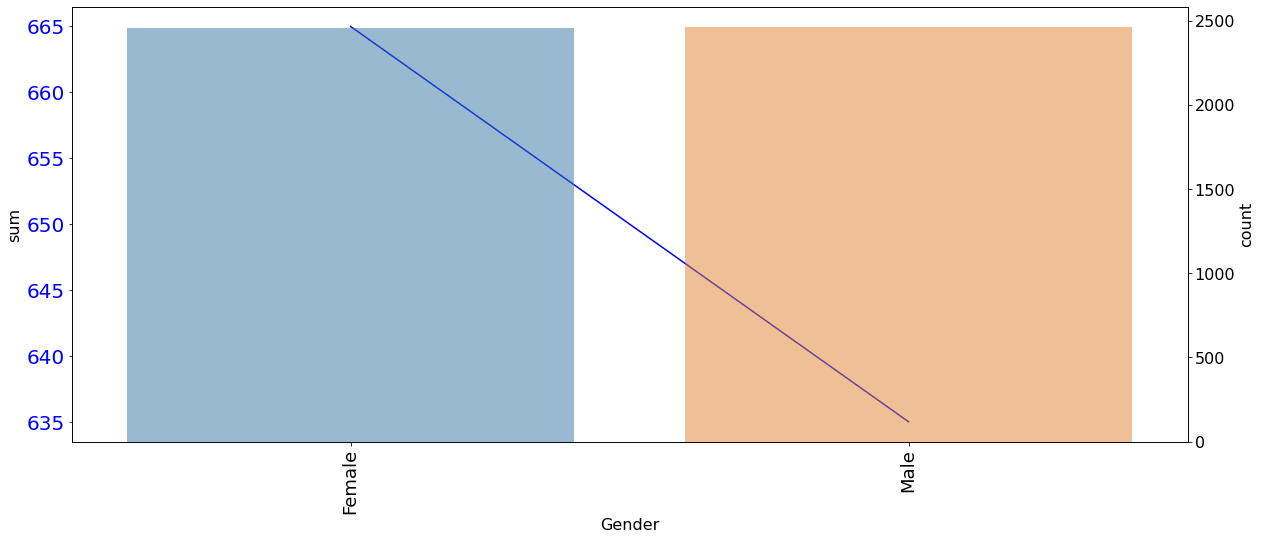

In [7]:
Data_Analytics(training,'Gender','Churn')

In the above graphic is shown the distribution of the Gender variable as an histogram. The blue line represents the total number of customers from each class that churned. There are slightly more Men than Women as customers. Women churned the most.

### The age of the customer?

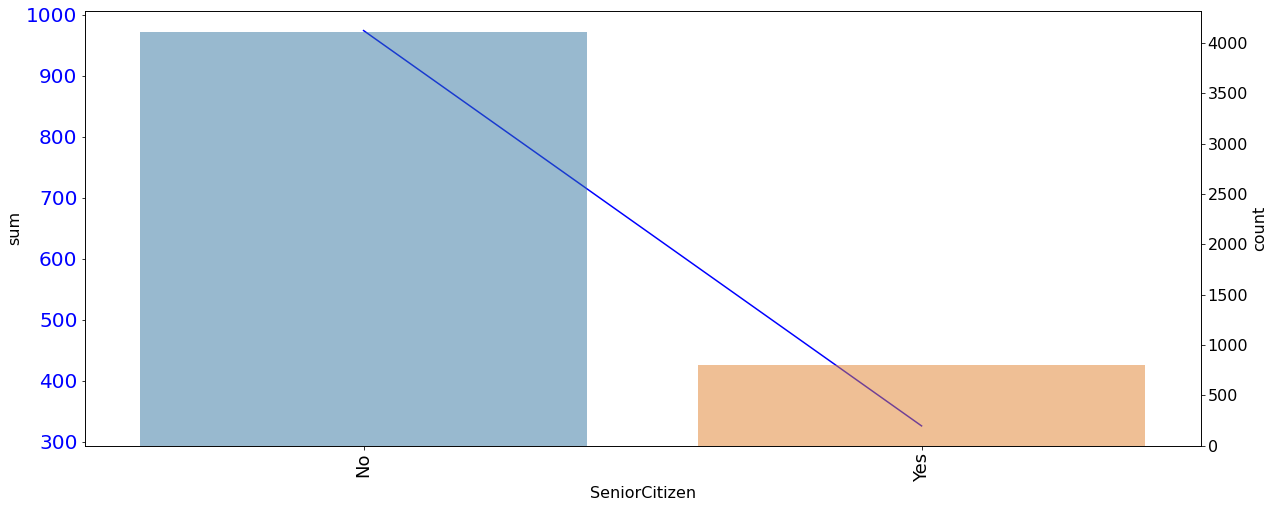

In [8]:
Data_Analytics(training,'SeniorCitizen','Churn')

In the above graphic is shown that most of the customers are less than 65 years old. Non-senior customers churned the most.

### The civil status of the customer?

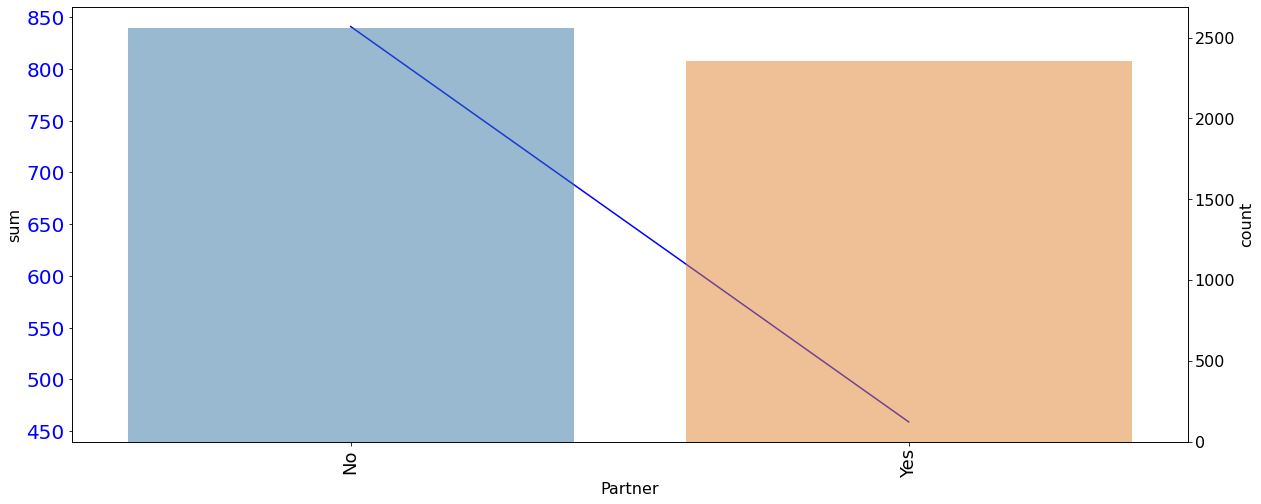

In [9]:
Data_Analytics(training,'Partner','Churn')

There are slightly more single customers than partnered ones. Single customers churned the most.

### The customer has dependents?

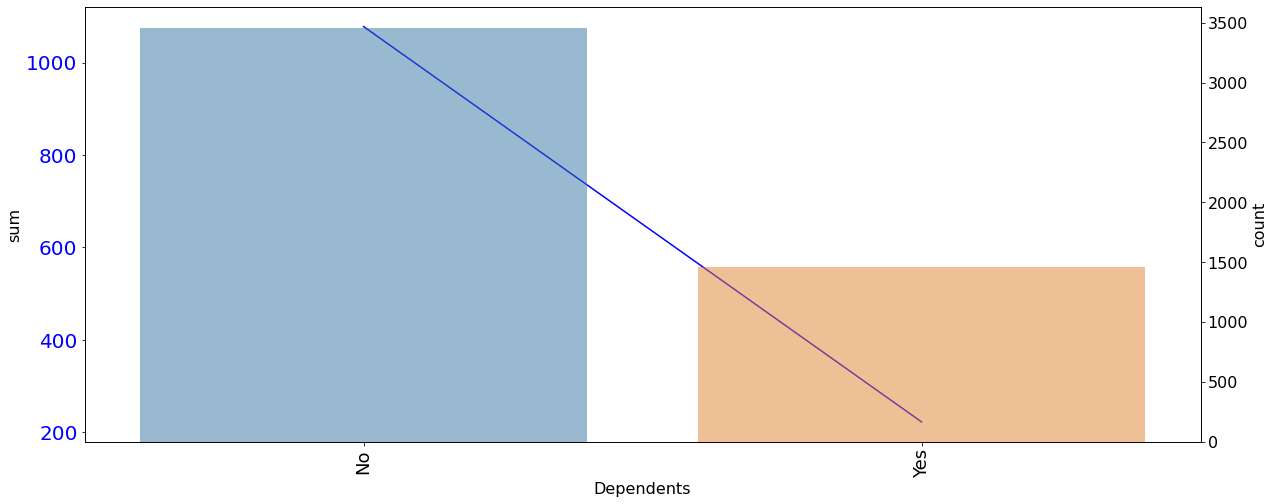

In [10]:
Data_Analytics(training,'Dependents','Churn')

There are more independent customers than dependent. From both groups, independents churned the most.

### The months the customers stayed with the company?

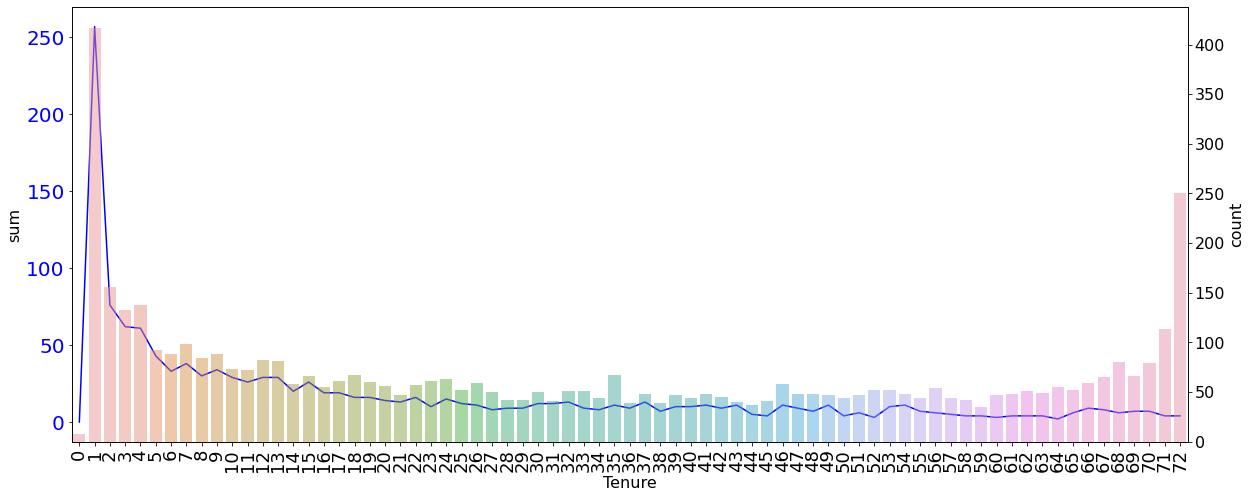

In [11]:
Data_Analytics(training,'Tenure','Churn')

In the above graphic, as an histogram, is shown how many months the customers stayed with the company. Most of them churned during the first month.

### The customer having a phone service?

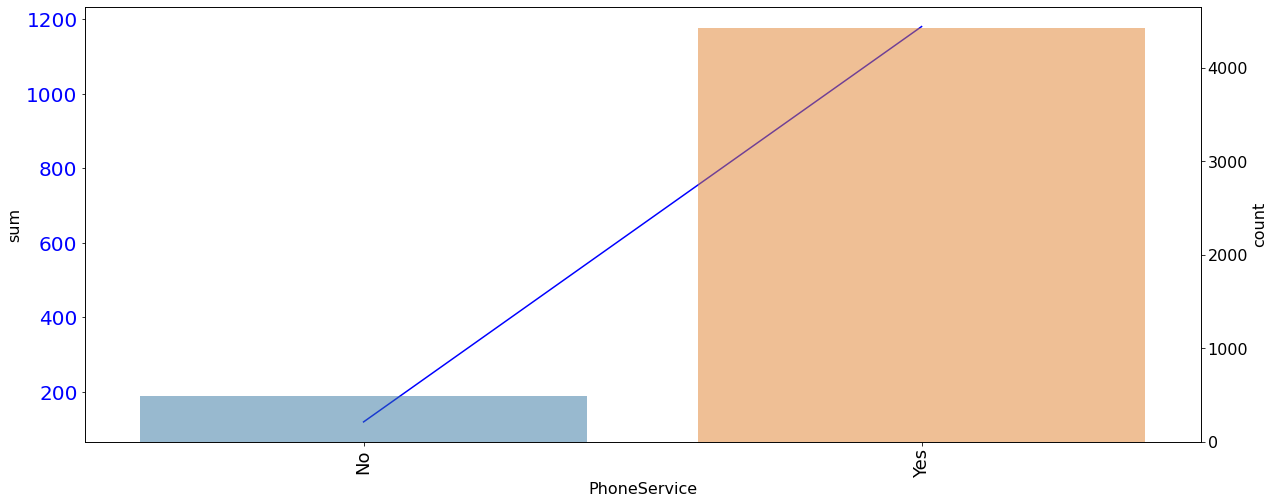

In [12]:
Data_Analytics(training,'PhoneService','Churn')

Most of the customers subscribed to a home phone service with the company, and they are the most that churned. 

### The customer having a multiple line services?

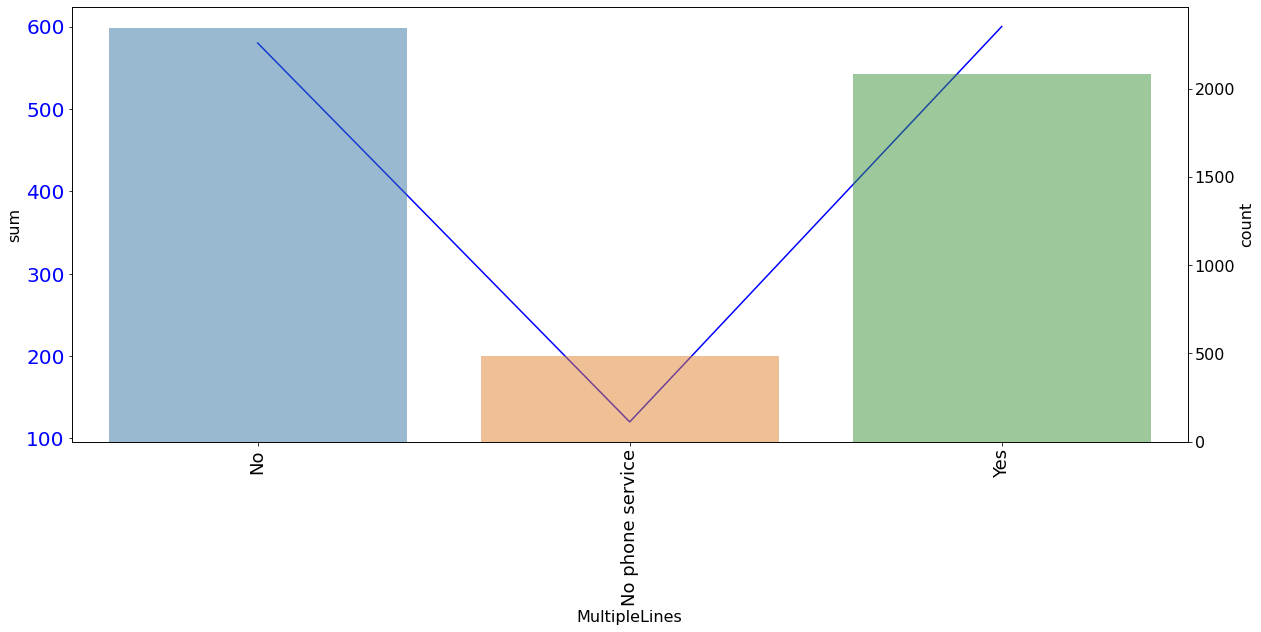

In [13]:
Data_Analytics(training,'MultipleLines','Churn')

Most of the customers have only one line, followed by those which have multiple lines and a small amount that doesn't have a phone service with the company. Customer with multiple lines churned the most, followed by those that have only one line.

### Which internet service does the customer have?

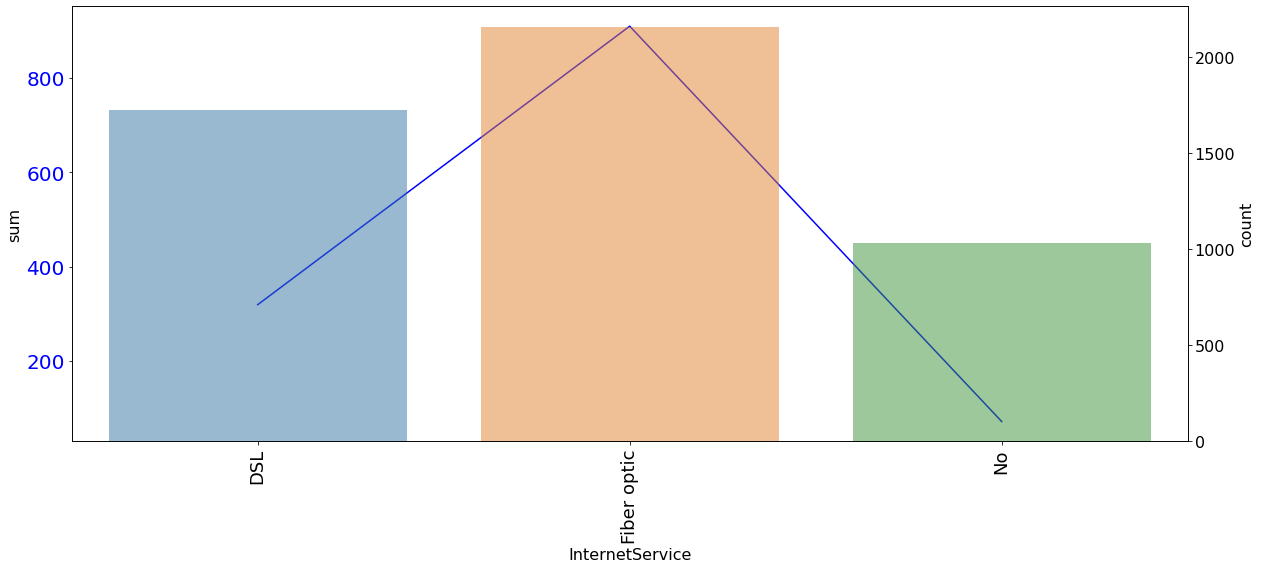

In [14]:
Data_Analytics(training,'InternetService','Churn')

Customers subscribed mostly to Fiber Optic. They churned the most, followed by the ones that subscribed DSL.

### Online security?

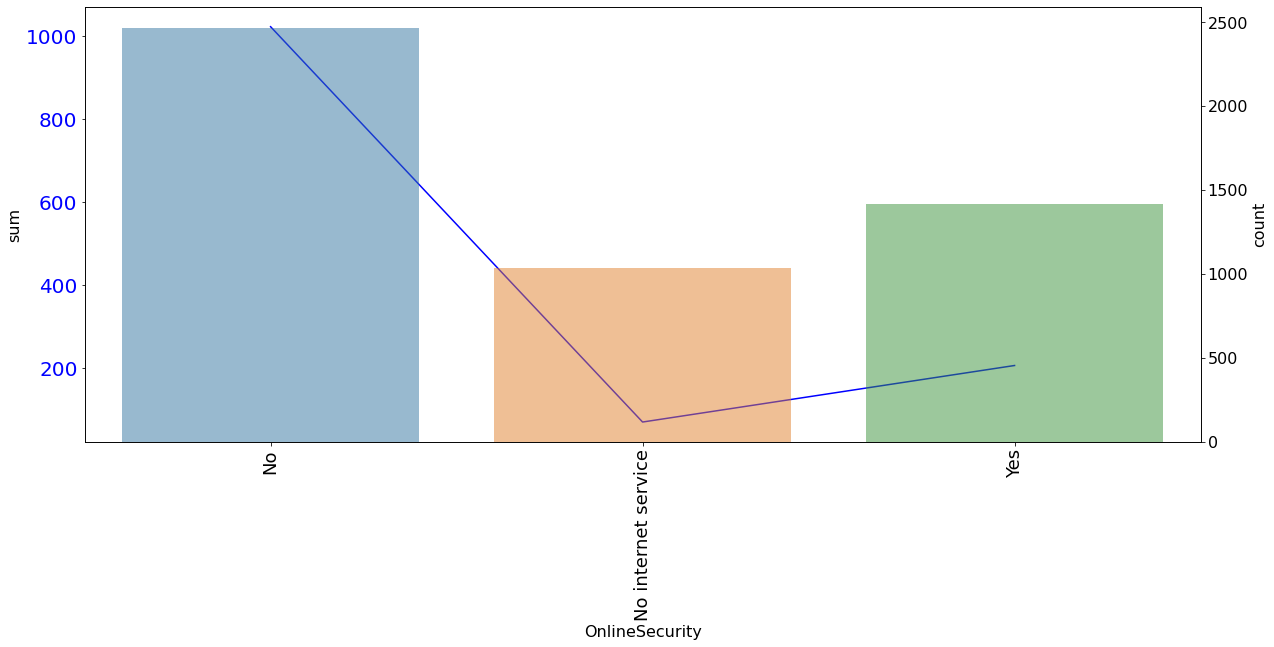

In [15]:
Data_Analytics(training,'OnlineSecurity','Churn')

The customer that didn't subscribe to an additional online security service churned the most.

### OnlineBackup?

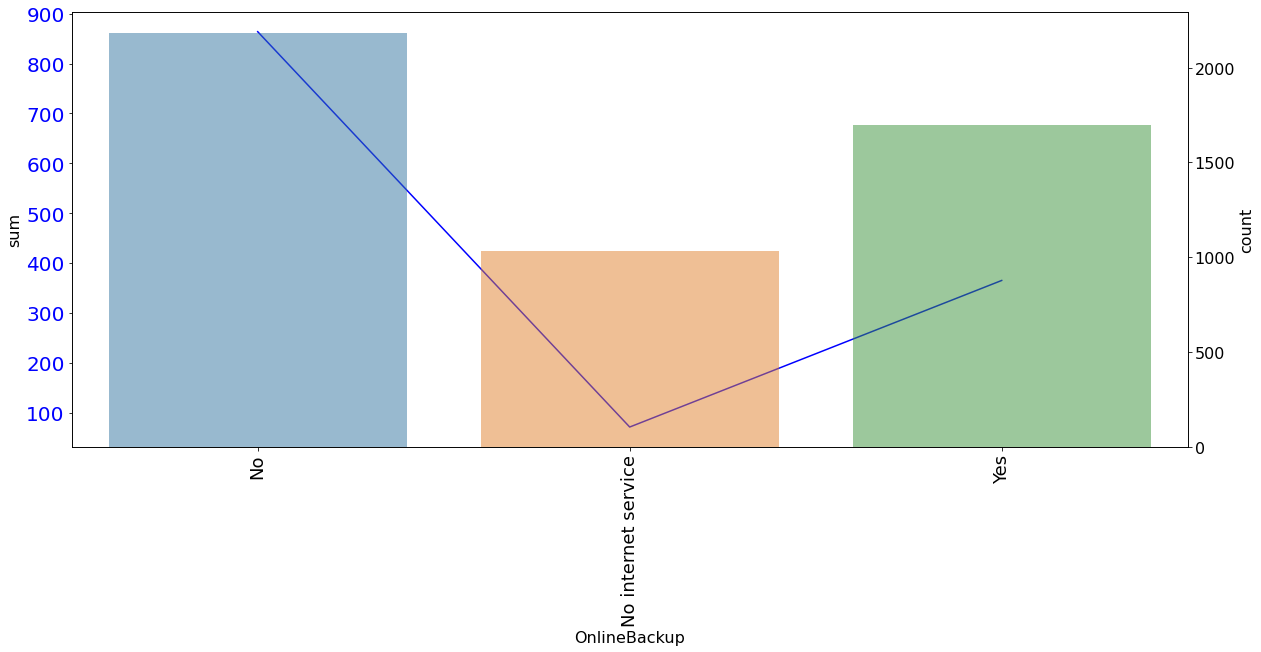

In [16]:
Data_Analytics(training,'OnlineBackup','Churn')

Most of the customers that didn't subscribe to an additional online backup service, churned.

### DeviceProtection?

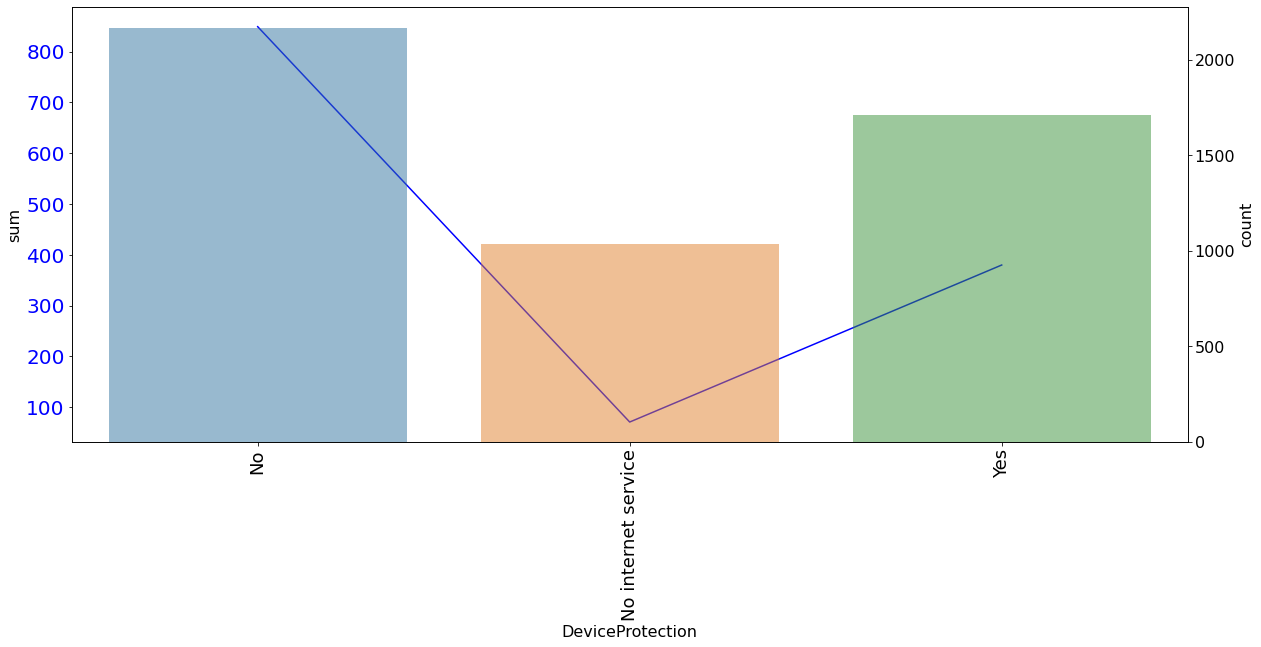

In [17]:
Data_Analytics(training,'DeviceProtection','Churn')

Customers that didn't subscribe to an additional device protection plan, churned the most.

### Tech Support?

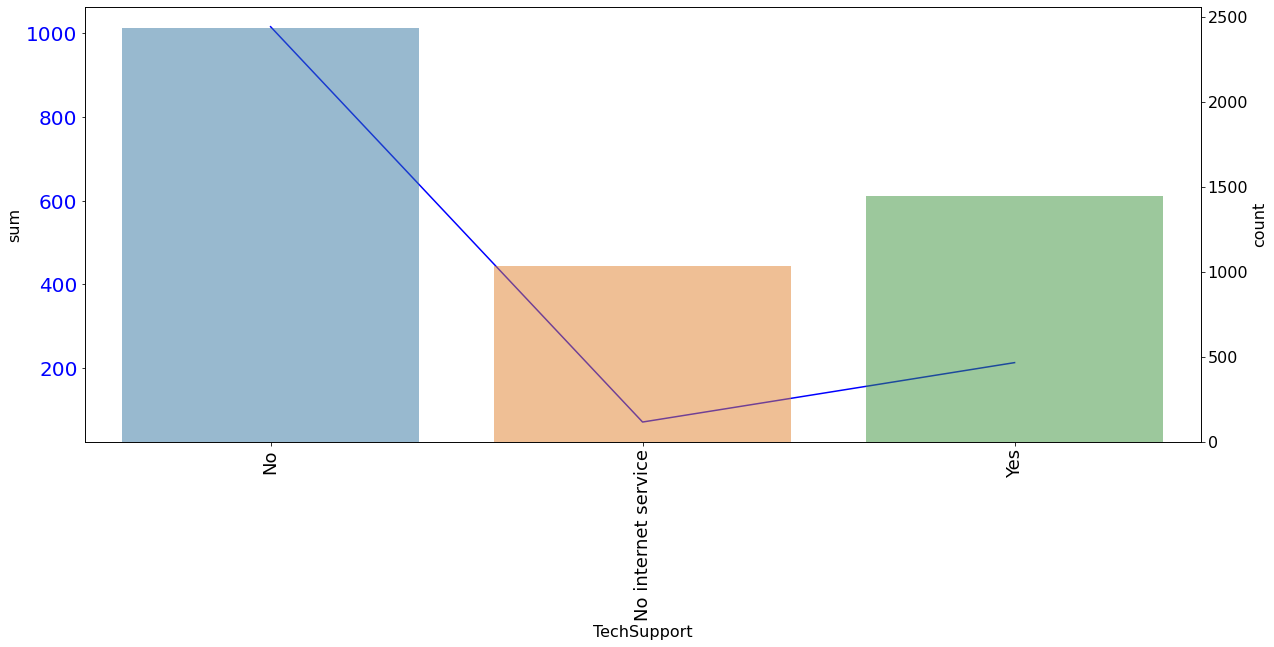

In [18]:
Data_Analytics(training,'TechSupport','Churn')

Customers that didn't subscribe to an additional technical support plan, churned the most.

### Streaming TV?

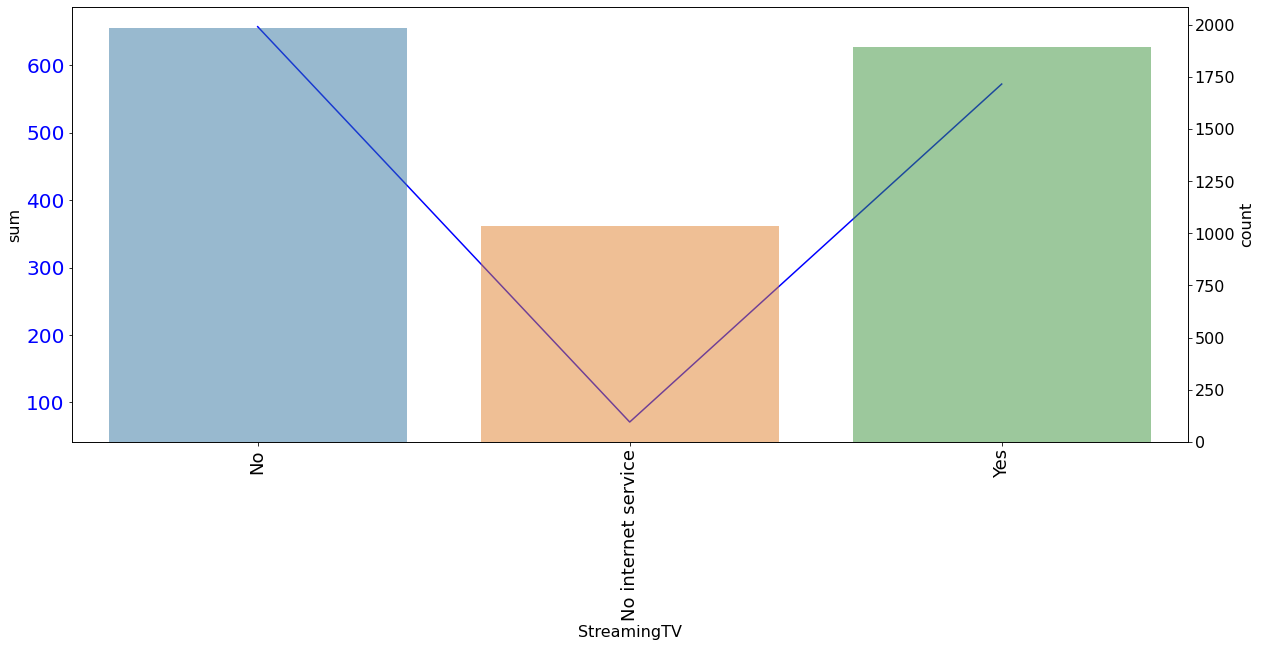

In [19]:
Data_Analytics(training,'StreamingTV','Churn')

Customer that don't use their Internet service to stream television programing, churned the most, followed by the ones who do.

### Streaming Movies?

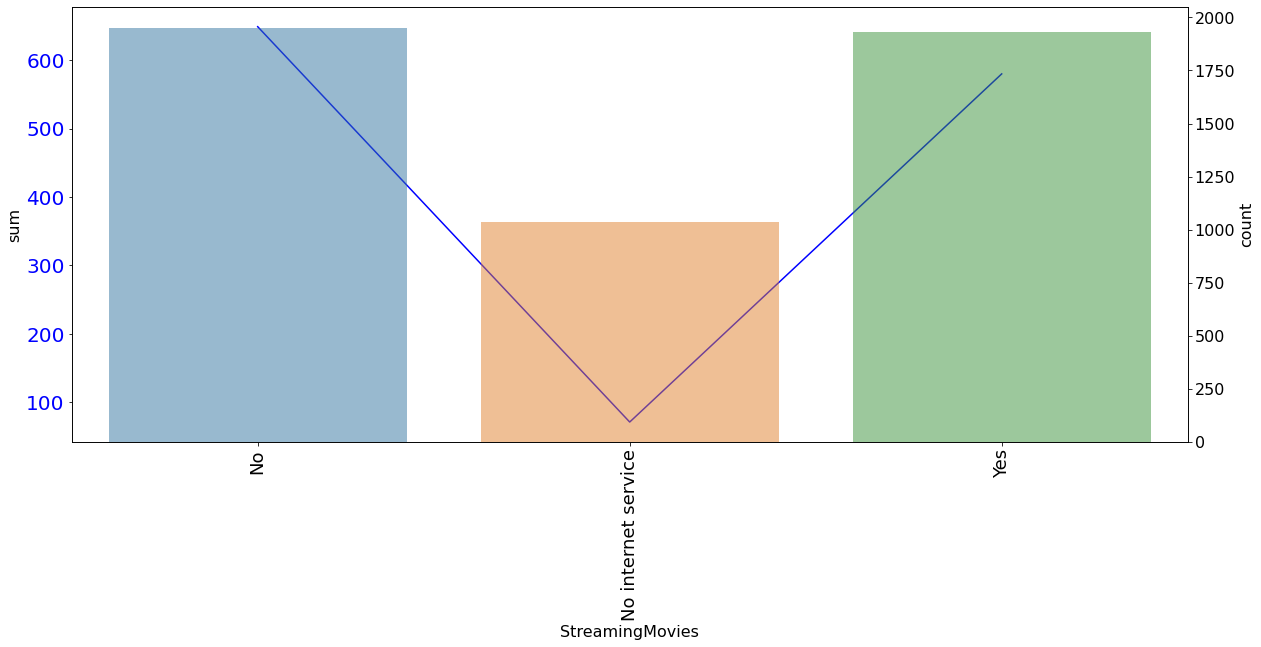

In [20]:
Data_Analytics(training,'StreamingMovies','Churn')

Customer that don't use their Internet service to stream movies, churned the most, followed by the ones who do.

### Contract?

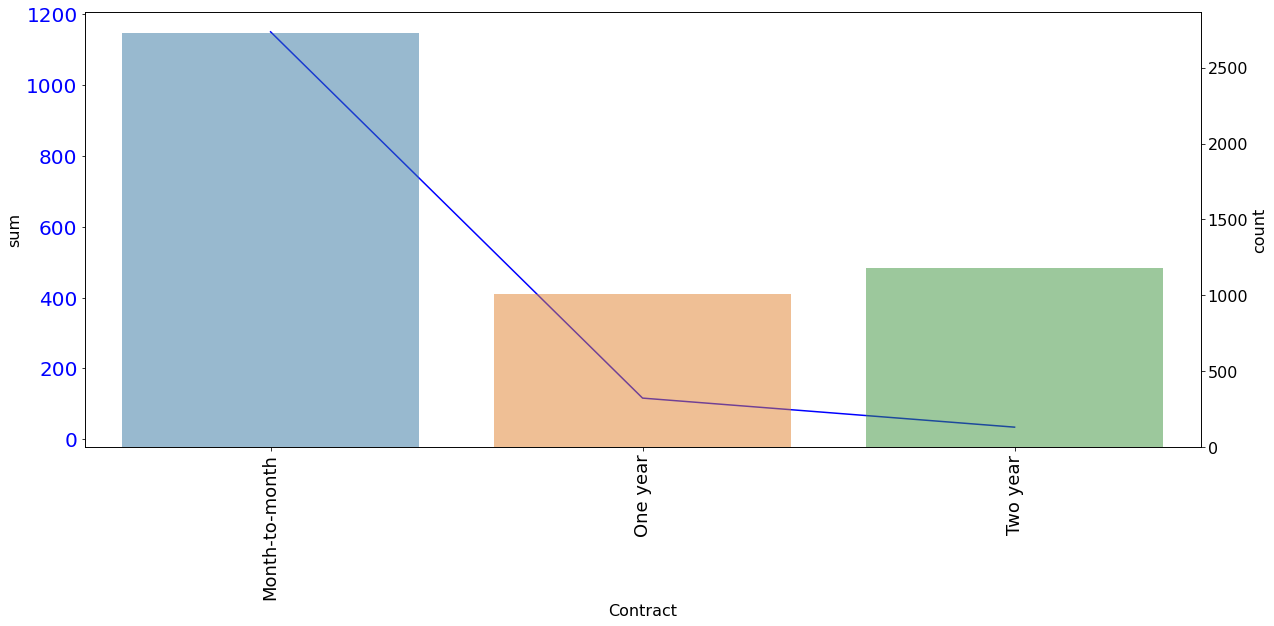

In [21]:
Data_Analytics(training,'Contract','Churn')

Customers with a Month-to-Month type of contracts, churned the most, followed by the ones that have One-year contracts.

### Paperless Billing?

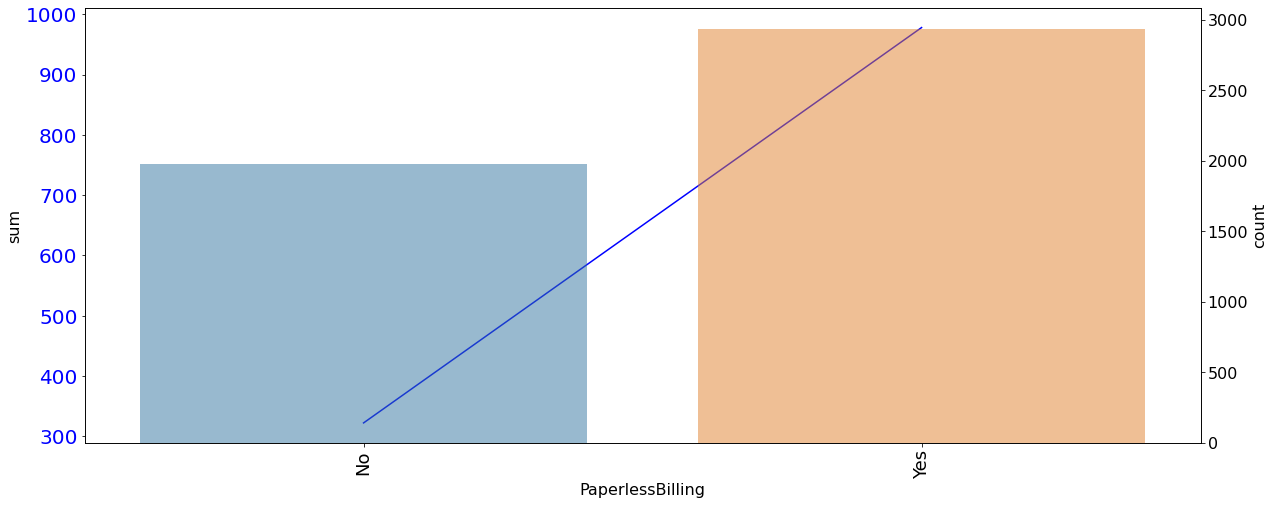

In [22]:
Data_Analytics(training,'PaperlessBilling','Churn')

Customer that have chosen paperless billing, churned the most.

### Payment Method?

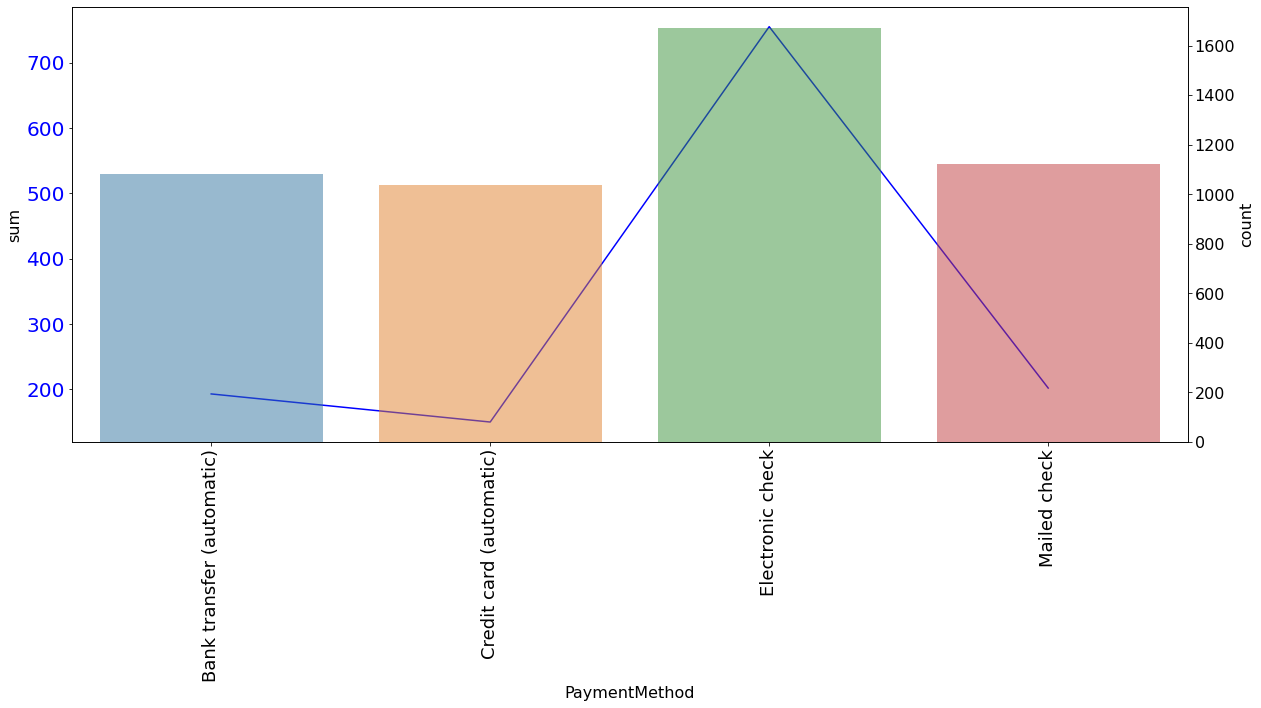

In [23]:
Data_Analytics(training,'PaymentMethod','Churn')

Customers that pay with Electronic Checks, churned the most.

# Missing data

I will impute the missing data.

In [24]:
training = dp.data_imputer(training,config.EVENT)
training

Missing values imputed


Gender SeniorCitizen Partner Dependents  Tenure PhoneService  \
Client                                                                     
6507-DTJZV    Male            No      No        Yes      13          Yes   
7274-CGTOD    Male            No      No         No      62           No   
7593-XFKDI    Male            No      No         No       1          Yes   
2405-LBMUW  Female            No     Yes        Yes      61           No   
6419-ZTTLE    Male           Yes     Yes         No      23          Yes   
...            ...           ...     ...        ...     ...          ...   
1468-DEFNC    Male           Yes     Yes        Yes      64          Yes   
5748-RNCJT    Male            No      No         No      69          Yes   
3331-HQDTW  Female            No      No         No      34          Yes   
1555-HAPSU  Female            No     Yes        Yes      71          Yes   
8705-WZCYL    Male            No      No         No       1          Yes   

               MultipleLines InternetService       OnlineSecurity  \
Client                                                              
6507-DTJZV                No             DSL                   No   
7274-CGTOD  No phone service             DSL                  Yes   
7593-XFKDI                No             DSL                   No   
2405-LBMUW  No phone service             DSL                  Yes   
6419-ZTTLE                No              No  No internet service   
...                      ...             ...                  ...   
1468-DEFNC               Yes              No  No internet service   
5748-RNCJT               Yes     Fiber optic                   No   
3331-HQDTW               Yes     Fiber optic                  Yes   
1555-HAPSU               Yes              No  No internet service   
8705-WZCYL                No             DSL                   No   

                   OnlineBackup     DeviceProtection          TechSupport  \
Client                                                                      
6507-DTJZV                   No                   No                   No   
7274-CGTOD                  Yes                  Yes                  Yes   
7593-XFKDI                   No                   No                   No   
2405-LBMUW                  Yes                   No                  Yes   
6419-ZTTLE  No internet service  No internet service  No internet service   
...                         ...                  ...                  ...   
1468-DEFNC  No internet service  No internet service  No internet service   
5748-RNCJT                   No                  Yes                  Yes   
3331-HQDTW                  Yes                  Yes                   No   
1555-HAPSU  No internet service  No internet service  No internet service   
8705-WZCYL                   No                   No                   No   

                    StreamingTV      StreamingMovies        Contract  \
Client                                                                 
6507-DTJZV                  Yes                  Yes  Month-to-month   
7274-CGTOD                   No                   No        Two year   
7593-XFKDI                   No                   No  Month-to-month   
2405-LBMUW                   No                  Yes        One year   
6419-ZTTLE  No internet service  No internet service        One year   
...                         ...                  ...             ...   
1468-DEFNC  No internet service  No internet service        Two year   
5748-RNCJT                  Yes                  Yes        Two year   
3331-HQDTW                  Yes                  Yes  Month-to-month   
1555-HAPSU  No internet service  No internet service        Two year   
8705-WZCYL                   No                   No  Month-to-month   

           PaperlessBilling              PaymentMethod  MonthlyCharges  \
Client                                                                   
6507-DTJZV               No    Credit 

## Censored data

One thing to take into account is that the variable 'Tenure' which measures the time (in months) that a customer has been with the company, reaches its maximum at 72 months. Customers such as '8338-QIUNR' haven't churned yet by this time, which means that he remains with the company during all this period. 

In [25]:
training.loc['8338-QIUNR']

Gender                                 Male
SeniorCitizen                            No
Partner                                 Yes
Dependents                              Yes
Tenure                                   72
PhoneService                            Yes
MultipleLines                           Yes
InternetService                         DSL
OnlineSecurity                          Yes
OnlineBackup                             No
DeviceProtection                        Yes
TechSupport                             Yes
StreamingTV                              No
StreamingMovies                          No
Contract                           Two year
PaperlessBilling                        Yes
PaymentMethod       Credit card (automatic)
MonthlyCharges                         66.5
TotalCharges                           4812
Churn                                     0
Name: 8338-QIUNR, dtype: object

However, customers such as: '8705-WZCYL', '6419-ZTTLE' and '1468-DEFNC', didn't churn at 1, 23, 64 months, which means that those customers that didn't churn but have Tenure less than 72 months, were lost from follow-up, in other words, they stopped using the services of the company but they never registered the rupture of the contract within the 72 months, or they moved out from city/country, died, etc. and the company never registered this issue.

In [26]:
training.loc['8705-WZCYL']

Gender                          Male
SeniorCitizen                     No
Partner                           No
Dependents                        No
Tenure                             1
PhoneService                     Yes
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges               44.8125
TotalCharges                 44.8125
Churn                              0
Name: 8705-WZCYL, dtype: object

In [27]:
training.loc['6419-ZTTLE']

Gender                             Male
SeniorCitizen                       Yes
Partner                             Yes
Dependents                           No
Tenure                               23
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       One year
PaperlessBilling                    Yes
PaymentMethod          Electronic check
MonthlyCharges                    20.75
TotalCharges                     485.25
Churn                                 0
Name: 6419-ZTTLE, dtype: object

In [28]:
training.loc['1468-DEFNC']

Gender                                   Male
SeniorCitizen                             Yes
Partner                                   Yes
Dependents                                Yes
Tenure                                     64
PhoneService                              Yes
MultipleLines                             Yes
InternetService                            No
OnlineSecurity            No internet service
OnlineBackup              No internet service
DeviceProtection          No internet service
TechSupport               No internet service
StreamingTV               No internet service
StreamingMovies           No internet service
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                        24.4062
TotalCharges                             1549
Churn                                       0
Name: 1468-DEFNC, dtype: object

This is known as censorship and suddenly complicates the prediction methods as one cannot apply any classical Machine Learning models, but only those adapted to perform a Survival Analysis.

The next function allows to censor the database up to a time of study, for example, up to 3, 45 or 72 months.
Feel free to use it to stop the study at a given 'censor' time and make predictions up to that moment in time.

In [29]:
def time_censoring(df,timeline,censor,event):
    # Inputs: a dataframe
    #         the name of the colum of the time-to-event
    #         the time one needs to censor
    #         the the name of the event column
    
    #Makes a copy of the input dataframe to not overwrite values
    data_frame = df.copy()
    
    # Censures the time-to-event column
    censored_times = [min(el,censor) for el in data_frame[timeline]]
    data_frame[timeline] = censored_times
    
    # Censures the event column
    data_frame[event] = np.where(data_frame[event] == 0, 0,
                                 np.where(data_frame[timeline] >= censor, 0, 1)) 
    
    # Returns the censored dataframe
    return data_frame

## Kaplan-Meier model

The Kaplan-Meier estimator is a non-parametric model used to estimate the survival function of a cohort. It allows us to have a global picture in time of when customers are churning. It gives us a dataframe with the time buckets, the number of customers at risk of churning at every time, the probability that the customers remain with the company and the lower and upper 95% confidence intervals.

I will add a new column with a datetime variable, starting let's say from Jan 1 2015 and increasing month by month according to the time buckets. I will plot the Customer retention probability.

In [30]:
# Defining the time-to-event variable and the event indicator 
T = training[config.TIMELINE]
E = training[config.EVENT]

# Displaying the survival data
survival_dataframe = dp.kaplan_meier_survival(T,E,0.95,'2015-01-01')
survival_dataframe

Time  Number at risk  Number of events  Survival  Survival - CI Lower  \
0    0.0            4917                 0  1.000000             1.000000   
1    1.0            4909               257  0.947647             0.953878   
2    2.0            4492                76  0.931614             0.938706   
3    3.0            4336                62  0.918293             0.926020   
4    4.0            4203                61  0.904965             0.913272   
..   ...             ...               ...       ...                  ...   
68  68.0             590                 6  0.627366             0.646637   
69  69.0             510                 7  0.618755             0.638789   
70  70.0             444                 7  0.609000             0.629981   
71  71.0             365                 4  0.602326             0.624073   
72  72.0             251                 4  0.592727             0.616074   

    Survival - CI Upper       Date  
0              1.000000 2015-01-01  
1              0.941416 2015-02-01  
2              0.924522 2015-03-01  
3              0.910566 2015-04-01  
4              0.896658 2015-05-01  
..                  ...        ...  
68             0.608095 2020-09-01  
69             0.598721 2020-10-01  
70             0.588019 2020-11-01  
71             0.580579 2020-12-01  
72             0.569381 2021-01-01  

[73 rows x 7 columns]

### Retention probability

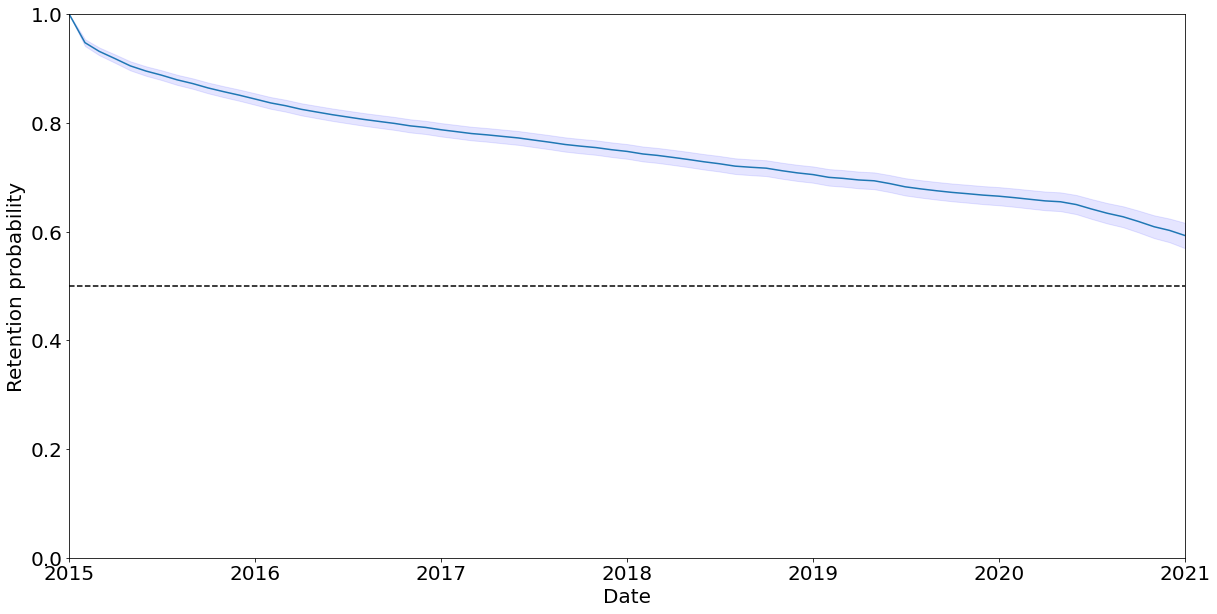

In [31]:
matplotlib.rc('font', size=20)                #Use big fonts and big plots  
matplotlib.rc('figure', facecolor='white')
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.plot(survival_dataframe.Date,survival_dataframe.Survival)
ax.plot(survival_dataframe.Date,[0.5 for el in range(len(survival_dataframe.Date))],'k--')
ax.fill_between(survival_dataframe.Date,
                (survival_dataframe['Survival - CI Lower']),
                (survival_dataframe['Survival - CI Upper']), color='b', alpha=.1)
plt.xlim('2015','2021')
plt.ylim(0.0,1.0)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Retention probability', fontsize=20)
plt.show()

I see that on average, customers are more likely to remain with the company during the first three years, then, the retention probability keeps decreasing in time, however, it never crosses the 0.5 threshold during all the Tenure time. The minimum value is in fact 0.59.

### Label Encoding

Before feeding any Machine Learning algorithm to produce a predictive model, I need to encode the categorical variables to numeric types. I will use the get_dummies function in Pandas. I will keep all the dummy variables, even when they are correlated, because I am not going to use any linear model for the analysis, but tree-based models, which may take advantage of this correlation.  

In [32]:
training = dp.categorical_encoding(training)
training

All categorical variables are encoded


Tenure  MonthlyCharges  TotalCharges  Churn  Gender_Female  \
Client                                                                   
6507-DTJZV      13        66.37500      832.0000      0              0   
7274-CGTOD      62        43.68750     2618.0000      0              0   
7593-XFKDI       1        46.31250       46.3125      1              0   
2405-LBMUW      61        50.68750     3088.0000      0              1   
6419-ZTTLE      23        20.75000      485.2500      0              0   
...            ...             ...           ...    ...            ...   
1468-DEFNC      64        24.40625     1549.0000      0              0   
5748-RNCJT      69       106.50000     7348.0000      1              0   
3331-HQDTW      34       109.81250     3588.0000      1              1   
1555-HAPSU      71        23.90625     1664.0000      0              1   
8705-WZCYL       1        44.81250       44.8125      0              0   

            Gender_Male  SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  \
Client                                                                     
6507-DTJZV            1                 1                  0           1   
7274-CGTOD            1                 1                  0           1   
7593-XFKDI            1                 1                  0           1   
2405-LBMUW            0                 1                  0           0   
6419-ZTTLE            1                 0                  1           0   
...                 ...               ...                ...         ...   
1468-DEFNC            1                 0                  1           0   
5748-RNCJT            1                 1                  0           1   
3331-HQDTW            0                 1                  0           1   
1555-HAPSU            0                 1                  0           0   
8705-WZCYL            1                 1                  0           1   

            Partner_Yes  ...  StreamingMovies_Yes  Contract_Month-to-month  \
Client                   ...                                                 
6507-DTJZV            0  ...                    1                        1   
7274-CGTOD            0  ...                    0                        0   
7593-XFKDI            0  ...                    0                        1   
2405-LBMUW            1  ...                    1                        0   
6419-ZTTLE            1  ...                    0                        0   
...                 ...  ...                  ...                      ...   
1468-DEFNC            1  ...                    0                        0   
5748-RNCJT            0  ...                    1                        0   
3331-HQDTW            0  ...                    1                        1   
1555-HAPSU            1  ...                    0                        0   
8705-WZCYL            0  ...                    0                        1   

            Contract_One year  Contract_Two year  PaperlessBilling_No  \
Client                                                                  
6507-DTJZV                  0                  0                    1   
7274-CGTOD                  0                  1                    0   
7593-XFKDI                  0                  0                    1   
2405-LBMUW                  1                  0                    0   
6419-ZTTLE                  1                  0                    0   
...                       ...                ...                  ...   
1468-DEFNC                  0                  1                    0   
5748-RNCJT                  0                  1                    0   
3331-HQDTW                  0                  0                    0   
1555-HAPSU                  0                  1                    1   
8705-WZCYL                  0                  0                    0   

            PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
Client            

### Numerical instability of the TotalCharges variable

I see that if I compute the mean of the variable TotalCharges, it gives inf, which is contradictory. This is in fact a bug in Pandas (https://github.com/pandas-dev/pandas/issues/22841) when dealing with float16 numbers. To avoid any bug and therefore, miss classification, I will remove this variable from the analysis.

In [33]:
training.TotalCharges.mean()

inf

In [34]:
training = training.drop('TotalCharges',axis=1)
training

Tenure  MonthlyCharges  Churn  Gender_Female  Gender_Male  \
Client                                                                  
6507-DTJZV      13        66.37500      0              0            1   
7274-CGTOD      62        43.68750      0              0            1   
7593-XFKDI       1        46.31250      1              0            1   
2405-LBMUW      61        50.68750      0              1            0   
6419-ZTTLE      23        20.75000      0              0            1   
...            ...             ...    ...            ...          ...   
1468-DEFNC      64        24.40625      0              0            1   
5748-RNCJT      69       106.50000      1              0            1   
3331-HQDTW      34       109.81250      1              1            0   
1555-HAPSU      71        23.90625      0              1            0   
8705-WZCYL       1        44.81250      0              0            1   

            SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
Client                                                                     
6507-DTJZV                 1                  0           1            0   
7274-CGTOD                 1                  0           1            0   
7593-XFKDI                 1                  0           1            0   
2405-LBMUW                 1                  0           0            1   
6419-ZTTLE                 0                  1           0            1   
...                      ...                ...         ...          ...   
1468-DEFNC                 0                  1           0            1   
5748-RNCJT                 1                  0           1            0   
3331-HQDTW                 1                  0           1            0   
1555-HAPSU                 1                  0           0            1   
8705-WZCYL                 1                  0           1            0   

            Dependents_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
Client                     ...                                                 
6507-DTJZV              0  ...                    1                        1   
7274-CGTOD              1  ...                    0                        0   
7593-XFKDI              1  ...                    0                        1   
2405-LBMUW              0  ...                    1                        0   
6419-ZTTLE              1  ...                    0                        0   
...                   ...  ...                  ...                      ...   
1468-DEFNC              0  ...                    0                        0   
5748-RNCJT              1  ...                    1                        0   
3331-HQDTW              1  ...                    1                        1   
1555-HAPSU              0  ...                    0                        0   
8705-WZCYL              1  ...                    0                        1   

            Contract_One year  Contract_Two year  PaperlessBilling_No  \
Client                                                                  
6507-DTJZV                  0                  0                    1   
7274-CGTOD                  0                  1                    0   
7593-XFKDI                  0                  0                    1   
2405-LBMUW                  1                  0                    0   
6419-ZTTLE                  1                  0                    0   
...                       ...                ...                  ...   
1468-DEFNC                  0                  1                    0   
5748-RNCJT                  0                  1                    0   
3331-HQDTW                  0                  0                    0   
1555-HAPSU                  0                  1                    1   
8705-WZCYL                  0                  0                    0   

            PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
Clien

I won't normalize nor scale the MonthlyCharges variable due to the fact that I am going to use a tree-based Machine Learning model. In fact, I did it before and the evaluated metric was lower than when leaving this variable in its normal state.

### Saving the preprocessed dataframe

In [35]:
ld.save_csv(training,config.PREPROCESSED)

### Reducing the memory usage one more time

In [36]:
training = dp.reduce_mem_usage(training)
training

Memory usage of dataframe is 0.41 MB --> 0.62 MB (Decreased by -48.7%)


Tenure  MonthlyCharges  Churn  Gender_Female  Gender_Male  \
Client                                                                  
6507-DTJZV      13        66.37500      0            0.0          1.0   
7274-CGTOD      62        43.68750      0            0.0          1.0   
7593-XFKDI       1        46.31250      1            0.0          1.0   
2405-LBMUW      61        50.68750      0            1.0          0.0   
6419-ZTTLE      23        20.75000      0            0.0          1.0   
...            ...             ...    ...            ...          ...   
1468-DEFNC      64        24.40625      0            0.0          1.0   
5748-RNCJT      69       106.50000      1            0.0          1.0   
3331-HQDTW      34       109.81250      1            1.0          0.0   
1555-HAPSU      71        23.90625      0            1.0          0.0   
8705-WZCYL       1        44.81250      0            0.0          1.0   

            SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
Client                                                                     
6507-DTJZV               1.0                0.0         1.0          0.0   
7274-CGTOD               1.0                0.0         1.0          0.0   
7593-XFKDI               1.0                0.0         1.0          0.0   
2405-LBMUW               1.0                0.0         0.0          1.0   
6419-ZTTLE               0.0                1.0         0.0          1.0   
...                      ...                ...         ...          ...   
1468-DEFNC               0.0                1.0         0.0          1.0   
5748-RNCJT               1.0                0.0         1.0          0.0   
3331-HQDTW               1.0                0.0         1.0          0.0   
1555-HAPSU               1.0                0.0         0.0          1.0   
8705-WZCYL               1.0                0.0         1.0          0.0   

            Dependents_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
Client                     ...                                                 
6507-DTJZV            0.0  ...                  1.0                      1.0   
7274-CGTOD            1.0  ...                  0.0                      0.0   
7593-XFKDI            1.0  ...                  0.0                      1.0   
2405-LBMUW            0.0  ...                  1.0                      0.0   
6419-ZTTLE            1.0  ...                  0.0                      0.0   
...                   ...  ...                  ...                      ...   
1468-DEFNC            0.0  ...                  0.0                      0.0   
5748-RNCJT            1.0  ...                  1.0                      0.0   
3331-HQDTW            1.0  ...                  1.0                      1.0   
1555-HAPSU            0.0  ...                  0.0                      0.0   
8705-WZCYL            1.0  ...                  0.0                      1.0   

            Contract_One year  Contract_Two year  PaperlessBilling_No  \
Client                                                                  
6507-DTJZV                0.0                0.0                  1.0   
7274-CGTOD                0.0                1.0                  0.0   
7593-XFKDI                0.0                0.0                  1.0   
2405-LBMUW                1.0                0.0                  0.0   
6419-ZTTLE                1.0                0.0                  0.0   
...                       ...                ...                  ...   
1468-DEFNC                0.0                1.0                  0.0   
5748-RNCJT                0.0                1.0                  0.0   
3331-HQDTW                0.0                0.0                  0.0   
1555-HAPSU                0.0                1.0                  1.0   
8705-WZCYL                0.0                0.0                  0.0   

            PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
Clien

# Machine Learning risk evaluation models

In this section I will use the enseble ML algorithm Conditional Survival Forest, which is an adaptation of the classical Random Forest algorithm with a different splitting strategy to perform Survival Analysis. The splitting strategy consists on testing the null hypothesis that the target and predictor variables are independents. For each predictor X, it computes the log-rank score test statistic and its associated p-value. The predictor X with the smallest p-value is selected as the splitting candidate. This model is developed and integrated into the library Pysurvival: [https://square.github.io/pysurvival/], which is in continuous development.

The model is produced via the script train.py and stored into the directory 'model'. The the hyperparameters of the model are optimized by globally minimizing 1-C, where C is the concordance index evaluated on a hold-out validation subsample, different to the one used to train. The inintially training subsample is divided into sub-training and validation subsamples with the ratio 70:30 everytime the metric function is called by the optimizer, thus evaluating the model and computing the metric everytime on a different subtrain-validation subsamples; this way I intend to reduce more the variance of the model by increasing randomness. Once the hyperparameters of the model are optimized, then I produce the model with the original (and larger) training sample. Once produced the model, I store it in the corresponding directory for further use.

Next, I will load the produced model and compute the concordance index of the whole training data, and show the feature importances, to understand which one of the variables represents high risks for the customer to churn.

In [37]:
from pysurvival.utils import load_model
from pysurvival.utils.metrics import concordance_index

model = load_model(config.MODEL)
X_train = training.drop([config.TIMELINE,config.EVENT],axis=1)
T_train = training[config.TIMELINE]
E_train = training[config.EVENT]
print("The concordance index of the model is: ",round(concordance_index(model, X_train, T_train, E_train),2)*100,'%')

Loading the model from /home/elopezfune/Desktop/Independen_Projects/Githup_Projects/Customers_Churn/models/csf_model.zip
The concordance index of the model is:  85.0 %


Once the model is loaded, the concordance is of 85%, which is very good for a dataset of only 4917 customers. In the following, I will show the variable importance for this model.

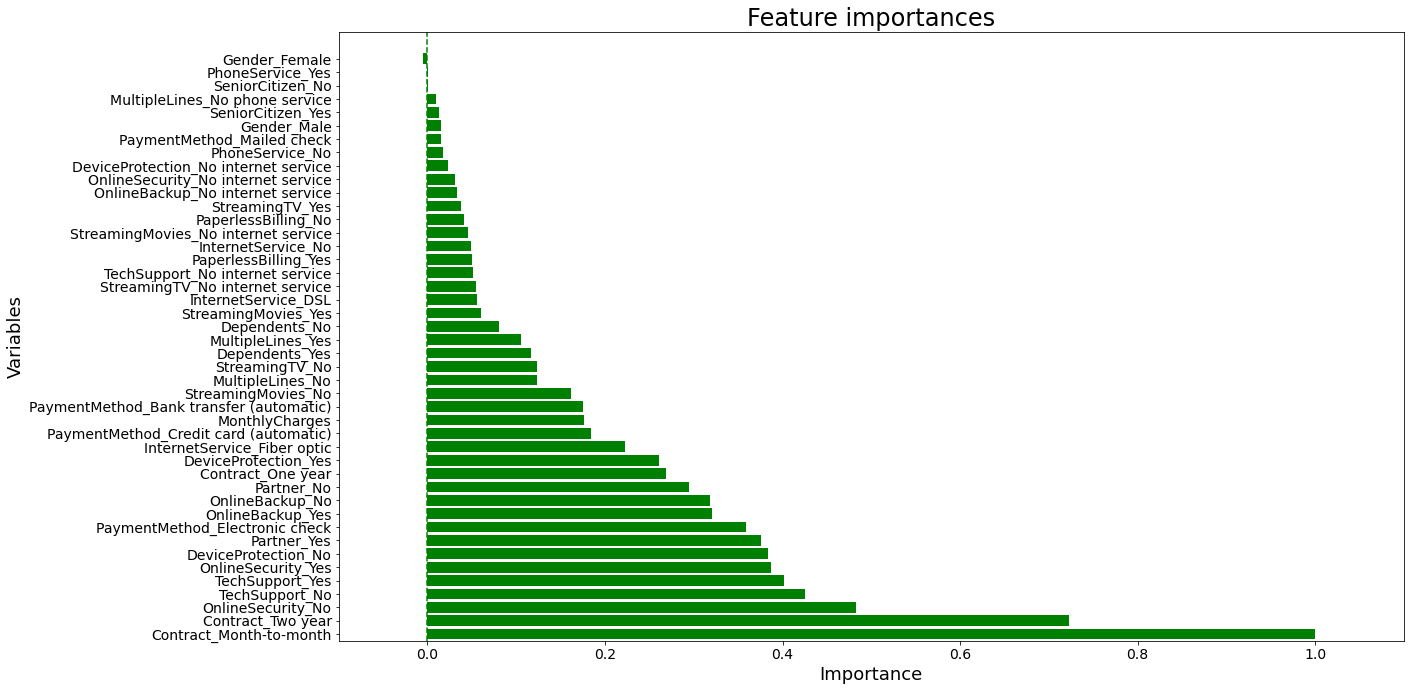

In [38]:
import matplotlib.pyplot as plt

# Variable importance of the model
importance = model.variable_importance_table

# Plot the variable importances of the model
plt.figure()
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.title("Feature importances")
plt.barh(importance["feature"],importance["importance"]/max(importance["importance"]),
         color="green")
plt.axvline(x=0.0, color='g', linestyle='--')
# Show everything
plt.xlim(-0.1, 1.1)
plt.ylim(-0.5, 45)
plt.xlabel("Importance",fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel("Variables",fontsize=18)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

I can see in this barplot which are the corresponding risk factors (normalized to the highest) in each variable. We obtained a similar result in the univariable analysis, but these results are more robust, as it takes into account the interactions of the variables, and as we shall see soon, it allows us to make predictions on future customers, unlike the univariate analysis. This barplot allows us as well to know what could be happening within the company that it is making the customers to churn and therefore, they need to arrange some politics.

### Risk groups

In this subsection I will construct the risk groups based on risk score distributions.  
(*Note: The current choice of the lower and upper bounds for each group is based on my intuition; so feel free to change the values so as to match your situation instead.*)

Here, it is possible to distinguish 2 main groups, low and high risk groups. Because the C-index is high, the model will be able to perfectly rank the survival times of a random unit of each group.  

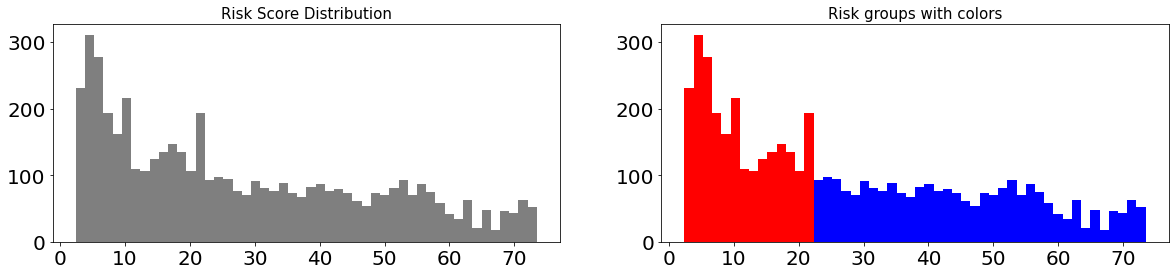

In [55]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(model=model,
                                 X=X_train,
                                 use_log = False,
                                 num_bins=50,
                                 figure_size=(20, 4),
                                 low= {'lower_bound':0, 'upper_bound':22, 'color':'red'},
                                 high= {'lower_bound':22, 'upper_bound':74, 'color':'blue'})

I will randomly select four customers and compare their retention probabilities. To demonstrate this point, I will purposely select customers that churned, to visualize the actual time-to-event and in which risk group they are in.

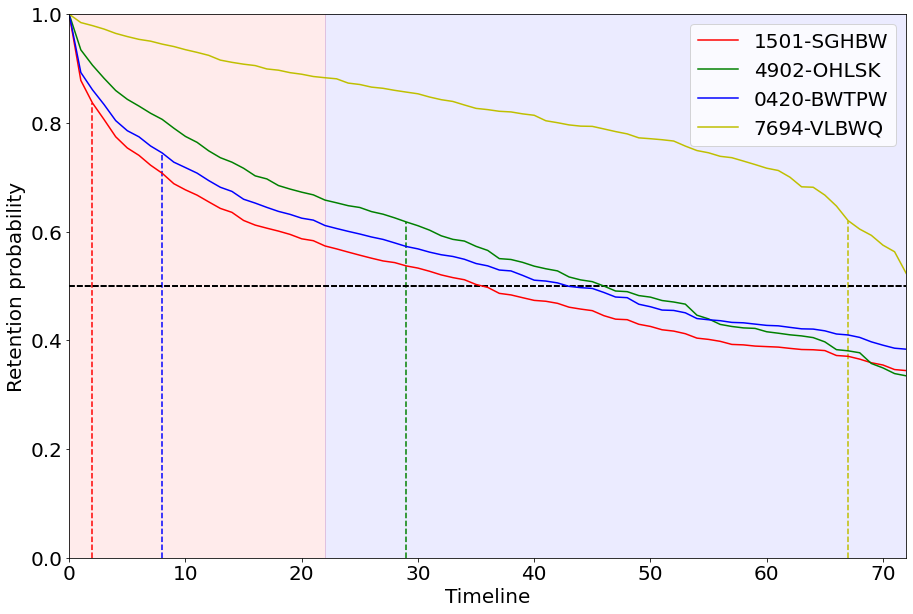

In [77]:
import random

num_of_customers = 4
churned_customers = training[training[config.EVENT]==1]
names = random.sample(set(churned_customers.index),num_of_customers)
X_churned = churned_customers.loc[names].drop([config.TIMELINE,config.EVENT],axis=1).values
T_churned = churned_customers.loc[names][config.TIMELINE].values
E_churned = churned_customers.loc[names][config.EVENT].values

colors = ['r', 'g', 'b', 'y']

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15.0, 10.0)
for i in range(len(names)):
    retention_probability = model.predict_survival(X_churned)
    plt.plot(retention_probability[i],color=colors[i])
    plt.vlines(T_churned[i], 0,retention_probability[i][T_churned[i]], linestyles='--',color=colors[i])
    plt.hlines(0.5, 0,72, colors='k', linestyles='--')
    ax.axvspan(0, 22, alpha=0.02, color='red')
    ax.axvspan(22, 72, alpha=0.02, color='blue')
        

plt.legend(names)
plt.xlabel('Timeline',fontsize=20)
plt.ylabel('Retention probability',fontsize=20)
plt.xlim(0,72)
plt.ylim(0,1)
plt.show()

I see that some of the randomly selected customers, at the time they churned, have high retention probabilities (p>0.5), which in principle could sound ilogic, since they churned already by this time and they are in the low risk zone. These two could be customers from the other 15% of non-concordance of the model. However, there are two others in the high risk group that their retention probabilities are comparables to the threshold 0.5. (Feel free to re-run this line till you observe it).

Now: how about the customers that didn't churn by the Tenure times?

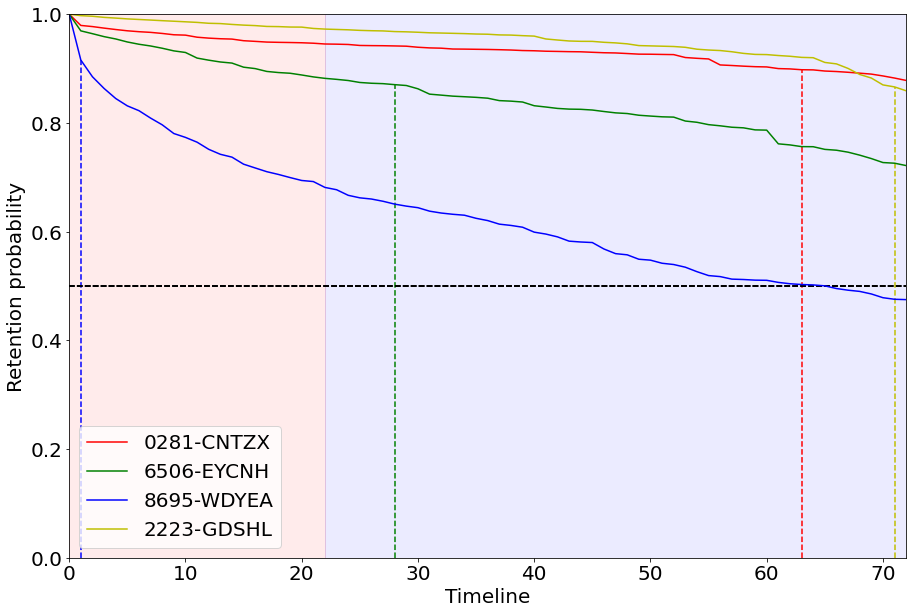

In [78]:
import random

num_of_customers = 4
churned_customers = training[training[config.EVENT]==0]
names = random.sample(set(churned_customers.index),num_of_customers)
X_churned = churned_customers.loc[names].drop([config.TIMELINE,config.EVENT],axis=1).values
T_churned = churned_customers.loc[names][config.TIMELINE].values
E_churned = churned_customers.loc[names][config.EVENT].values

colors = ['r', 'g', 'b', 'y']

fig, ax = plt.subplots()
for i in range(len(names)):
    retention_probability = model.predict_survival(X_churned)
    plt.plot(retention_probability[i],color=colors[i])
    plt.vlines(T_churned[i], 0,retention_probability[i][T_churned[i]], linestyles='--',color=colors[i])
    plt.hlines(0.5, 0,72, colors='k', linestyles='--')
    ax.axvspan(0, 22, alpha=0.02, color='red')
    ax.axvspan(22, 72, alpha=0.02, color='blue')
        

plt.legend(names)
plt.xlabel('Timeline',fontsize=20)
plt.ylabel('Retention probability',fontsize=20)
plt.xlim(0,72)
plt.ylim(0,1)
plt.show()

I see that their retention probabilities at the Tenure times is high compared to the threshold 0.5, which is good. Customer 8696-WDYEA was lost-track during the first month, however, the model predicts the churning at 62 months.

### Actual and predicted numbers of Customers that churned or not

Now that I have built a model that seems to provide a great performance, I will compare the time series of the actual and predicted number of Customers who churned or not, for each time t. This is done with the helper function 'compare_to_actual'. The parameter 'is_at_risk' is boolean and if it is set to True, it shows the "actual vs. expected" number of Customers at risk of churning, and if it's False, it shows the "actual vs. expected" number of Customers experiencing the churn.

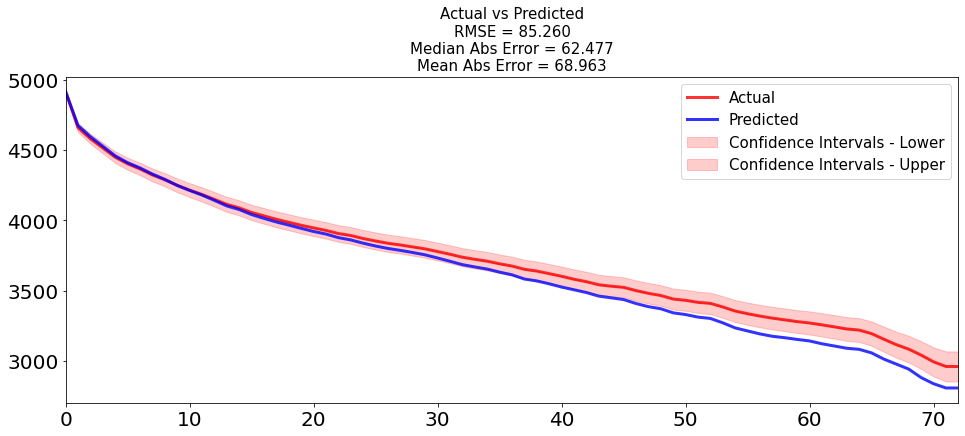

{'root_mean_squared_error': 85.25954786880736,
 'median_absolute_error': 62.47678851084402,
 'mean_absolute_error': 68.9626980096093}

In [79]:
from pysurvival.utils.display import compare_to_actual


compare_to_actual(model, X_train, T_train, E_train,
                  is_at_risk = True,  figure_size=(16, 6),
                  metrics = ['rmse', 'mean', 'median'])

I see that on the training subsample, the evolution in time of the expected number of Customers at risk of churning and the real one are quite close. The red shaded area corresponds to the 95% confidence intervals. The relationship is tight for the first 40 months. 

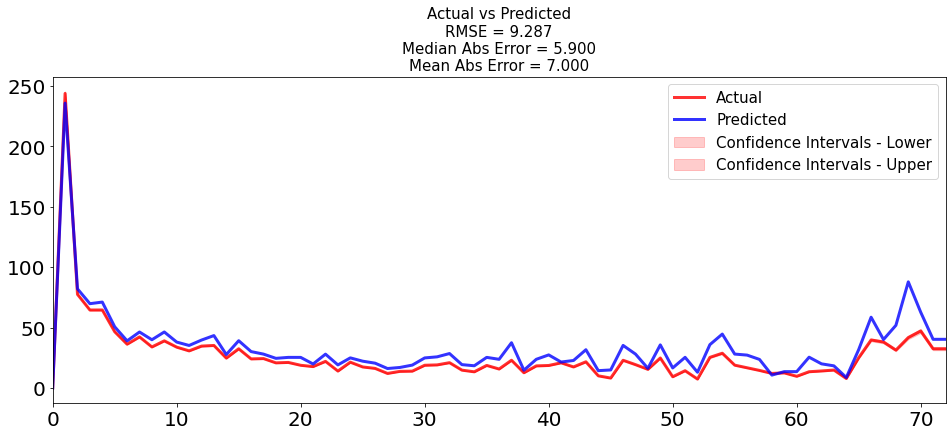

{'root_mean_squared_error': 9.286889618066693,
 'median_absolute_error': 5.9004128171548285,
 'mean_absolute_error': 6.999879387469974}

In [43]:
compare_to_actual(model, X_train, T_train, E_train,
                  is_at_risk = False,  figure_size=(16, 6),
                  metrics = ['rmse', 'mean', 'median'])

I see as well that on the training subsample, the evolution in time of the expected number of Customers that churned and the real one are quite close, however, the model tends to over predict, specially after the first few months. As in the previous case, the red shaded area corresponds to the 95% confidence intervals.

### Calibration curves

In this subsection I will compare the real and expected retention probabilities of Customers in the training subsample, at the mean time of their contracts.

In [88]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.calibration import calibration_curve

def Calibration_Plots(model, data_frame, timeline, event, time_censure):
    
    #Inputs: model: pre-fitted model
    #.       data_frame: the dataframe to make predictions for
    #.       timeline: the name of the time-to-event column in dataframe
    #.       event: the name of the event-of-interest column in dataframe
    #.       time_censure: the time at which one needs to perform the validation
    
    return survival_probability_calibration(model, data_frame.drop([str(timeline),str(event)],axis=1),data_frame[str(timeline)],data_frame[str(event)], time_censure)

def survival_probability_calibration(model, X, T, E, t0, ax=None):
    r"""
    Smoothed calibration curves for time-to-event models. This is analogous to
    calibration curves for classification models, extended to handle survival probabilities
    and censoring. Produces a matplotlib figure and an histogram.
    We want to calibrate our model's prediction of :math:`P(T < \text{t0})` against the observed frequencies.
    Parameters
    -------------
    model: a fitted model to be evaluated
    X: a DataFrame with the covariates - if equal to the training data, then this is an in-sample calibration. Could also be an out-of-sample
        dataset.
    t0: float - the time to evaluate the probability of event occurring prior at.
    
    Returns
    ----------
    ax:
        mpl axes
    """
    
    # plot our results
    if ax is None:
        ax = plt.gca()
        
    #ax = plt.subplot2grid((3, 1), (0, 0), rowspan=1) 

    ax.plot([0, 1], [0, 1], "k:") 
    probs = 1-np.array(model.predict_survival(X, t0))
    actual = E 

    fraction_of_positives, mean_predicted_value = calibration_curve(actual, probs, n_bins=20, normalize=False) 

    ax.plot(1-mean_predicted_value, 1-fraction_of_positives, "s-", color='red') 
    
    ax.set_xlabel("Predicted %d year retention" % t0, fontsize = 20)
    ax.set_ylabel("Fraction of customers retained %d years" % t0, fontsize = 20)
    plt.xticks(rotation=0,fontsize=16)
    plt.yticks(rotation=0,fontsize=16)
    plt.xlim(0,1)
    plt.ylim(0,1)

    #plt.tight_layout()
    #ax.set_frame_on(True)
    plt.grid(False)
    ax.set_facecolor('white')
    ax.spines['bottom'].set_color('0.1')
    ax.spines['top'].set_color('0.1')
    ax.spines['right'].set_color('0.1')
    ax.spines['left'].set_color('0.1')
    plt.show()
    #return ax

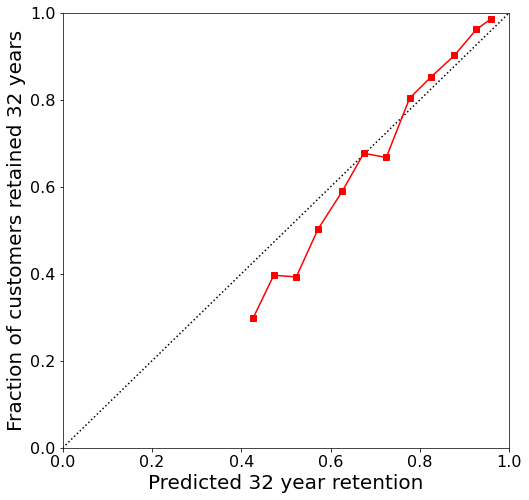

In [89]:
plt.rcParams['figure.figsize'] = (8.0, 8.0) # To set figure sizes for big plots
plt.rcParams['axes.edgecolor'] = "black"

Calibration_Plots(model, training, config.TIMELINE, config.EVENT, training[config.TIMELINE].mean())

I see on average a good agreement between the real and predicted retention probabilities, which means that the model shows on average a good calibration of the predicted probabilies.

## Testing the quality of the model with unseen data

In [92]:
testing = ld.load_data(config.TESTING,config.ID_VAR)
testing = dp.reduce_mem_usage(testing)
testing = dp.data_imputer(testing,config.EVENT)
testing = dp.categorical_encoding(testing)
testing = testing.drop('TotalCharges',axis=1)
testing = dp.reduce_mem_usage(testing)
testing

Data loaded correctly.
Memory usage of dataframe is 0.34 MB --> 0.06 MB (Decreased by 81.7%)
Missing values imputed
All categorical variables are encoded
Memory usage of dataframe is 0.11 MB --> 0.20 MB (Decreased by -78.2%)


Tenure  MonthlyCharges  Churn  Gender_Female  Gender_Male  \
Client                                                                  
8152-UOBNY      50      106.812500      0            1.0          0.0   
8950-MTZNV       1       44.937500      0            0.0          1.0   
3948-KXDUF      66       68.750000      0            0.0          1.0   
7169-YWAMK      72       68.375000      0            0.0          1.0   
8868-GAGIO      45       84.562500      0            0.0          1.0   
...            ...             ...    ...            ...          ...   
7940-UQQUG      64      104.375000      0            1.0          0.0   
0125-LZQXK      15      101.375000      1            0.0          1.0   
2324-AALNO      48       24.546875      0            1.0          0.0   
6719-OXYBR      15       85.312500      0            0.0          1.0   
3170-NMYVV      50       20.156250      0            1.0          0.0   

            SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
Client                                                                     
8152-UOBNY               0.0                1.0         1.0          0.0   
8950-MTZNV               1.0                0.0         1.0          0.0   
3948-KXDUF               1.0                0.0         1.0          0.0   
7169-YWAMK               1.0                0.0         0.0          1.0   
8868-GAGIO               1.0                0.0         0.0          1.0   
...                      ...                ...         ...          ...   
7940-UQQUG               1.0                0.0         0.0          1.0   
0125-LZQXK               1.0                0.0         1.0          0.0   
2324-AALNO               1.0                0.0         1.0          0.0   
6719-OXYBR               1.0                0.0         1.0          0.0   
3170-NMYVV               1.0                0.0         0.0          1.0   

            Dependents_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
Client                     ...                                                 
8152-UOBNY            1.0  ...                  1.0                      0.0   
8950-MTZNV            1.0  ...                  0.0                      1.0   
3948-KXDUF            1.0  ...                  0.0                      0.0   
7169-YWAMK            0.0  ...                  0.0                      0.0   
8868-GAGIO            1.0  ...                  0.0                      1.0   
...                   ...  ...                  ...                      ...   
7940-UQQUG            0.0  ...                  1.0                      0.0   
0125-LZQXK            1.0  ...                  1.0                      1.0   
2324-AALNO            1.0  ...                  0.0                      0.0   
6719-OXYBR            1.0  ...                  0.0                      1.0   
3170-NMYVV            0.0  ...                  0.0                      0.0   

            Contract_One year  Contract_Two year  PaperlessBilling_No  \
Client                                                                  
8152-UOBNY                1.0                0.0                  0.0   
8950-MTZNV                0.0                0.0                  0.0   
3948-KXDUF                0.0                1.0                  1.0   
7169-YWAMK                0.0                1.0                  1.0   
8868-GAGIO                0.0                0.0                  0.0   
...                       ...                ...                  ...   
7940-UQQUG                1.0                0.0                  0.0   
0125-LZQXK                0.0                0.0                  0.0   
2324-AALNO                1.0                0.0                  1.0   
6719-OXYBR                0.0                0.0                  1.0   
3170-NMYVV                0.0                1.0                  1.0   

            PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
Clien

### Validation with the test subsample

I will compute now the concordance index with the test subsample and the predictions of the model on this subsample.

In [93]:
X_test = testing.drop([config.TIMELINE,config.EVENT],axis=1)
T_test = testing[config.TIMELINE].values
E_test = testing[config.EVENT].values

print("The concordance index on the test subsample is: ",round(concordance_index(model, X_test, T_test, E_test),2)*100,'%')

The concordance index on the test subsample is:  83.0 %


The concordance index on the test subsample is of 83%, which is a bit lower than on the training subsample, but still comparable. This is a guarantee that the produced model is not overfitted. 

### Risk groups

As in the training subsample, I will construct the risk groups based on risk scores distribution.  
(*Note: The current choice of the lower and upper bounds for each group is based on my intuition; so feel free to change the values so as to match your situation instead.*)

Here, it is possible to distinguish 2 main groups, low and high risk groups. Because the C-index is high, the model will be able to perfectly rank the survival times of a random unit of each group.  

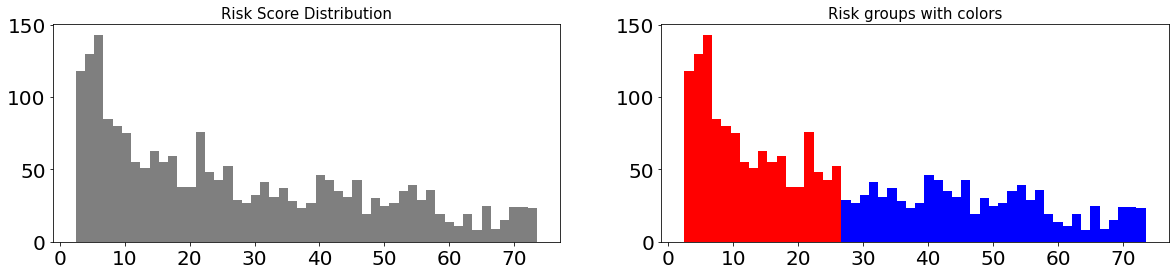

In [95]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(model=model,
                                 X=X_test,
                                 use_log = False,
                                 num_bins=50,
                                 figure_size=(20, 4),
                                 low= {'lower_bound':0, 'upper_bound':26, 'color':'red'},
                                 high= {'lower_bound':26, 'upper_bound':74, 'color':'blue'})

I will randomly select individual customers in each group and compare their retention probabilities. To demonstrate this point, I will purposely select customers which churned, to visualize the actual time of event. 

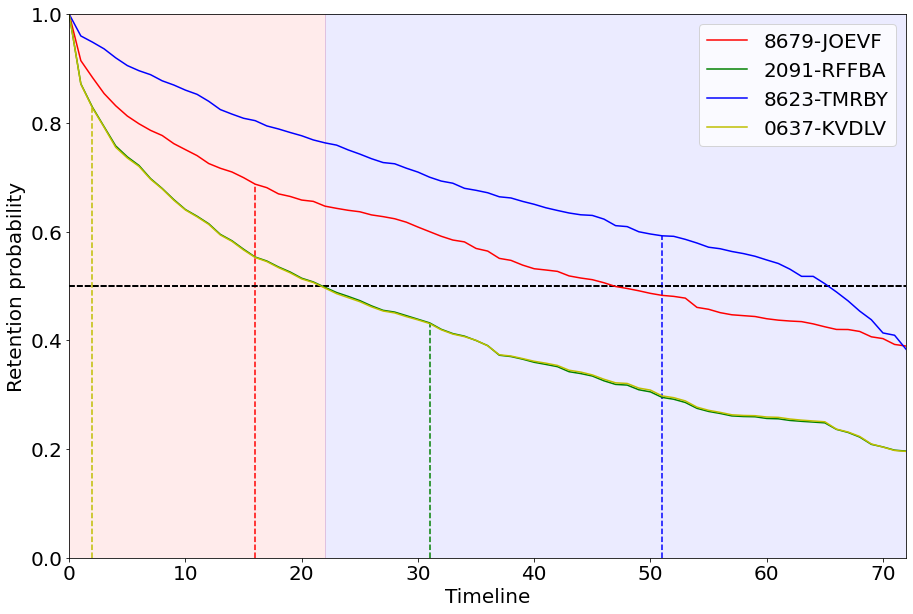

In [98]:
import random

num_of_customers = 4
churned_customers = testing[testing[config.EVENT]==1]
names = random.sample(set(churned_customers.index),num_of_customers)
X_churned = churned_customers.loc[names].drop([config.TIMELINE,config.EVENT],axis=1).values
T_churned = churned_customers.loc[names][config.TIMELINE].values
E_churned = churned_customers.loc[names][config.EVENT].values

colors = ['r', 'g', 'b', 'y']

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15.0, 10.0)
for i in range(len(names)):
    retention_probability = model.predict_survival(X_churned)
    plt.plot(retention_probability[i],color=colors[i])
    plt.vlines(T_churned[i], 0,retention_probability[i][T_churned[i]], linestyles='--',color=colors[i])
    plt.hlines(0.5, 0,72, colors='k', linestyles='--')
    ax.axvspan(0, 22, alpha=0.02, color='red')
    ax.axvspan(22, 72, alpha=0.02, color='blue')
        

plt.legend(names)
plt.xlabel('Timeline',fontsize=20)
plt.ylabel('Retention probability',fontsize=20)
plt.xlim(0,72)
plt.ylim(0,1)
plt.show()

I see, as in the previous case, that some of the randomly selected customers, at the time they churned, have high retention probabilities (p>0.5), which in principle could sound ilogic, since they churned already by this time and they are in the low risk zone. These two could be customers from the other 17% of non-concordance of the model. However, there are two others in the high risk group; one with retention probability comparable to the threshold 0.5 and one who churned. (Feel free to re-run this line till you observe it).

Now: how about the customers that didn't churn by the Tenure times?

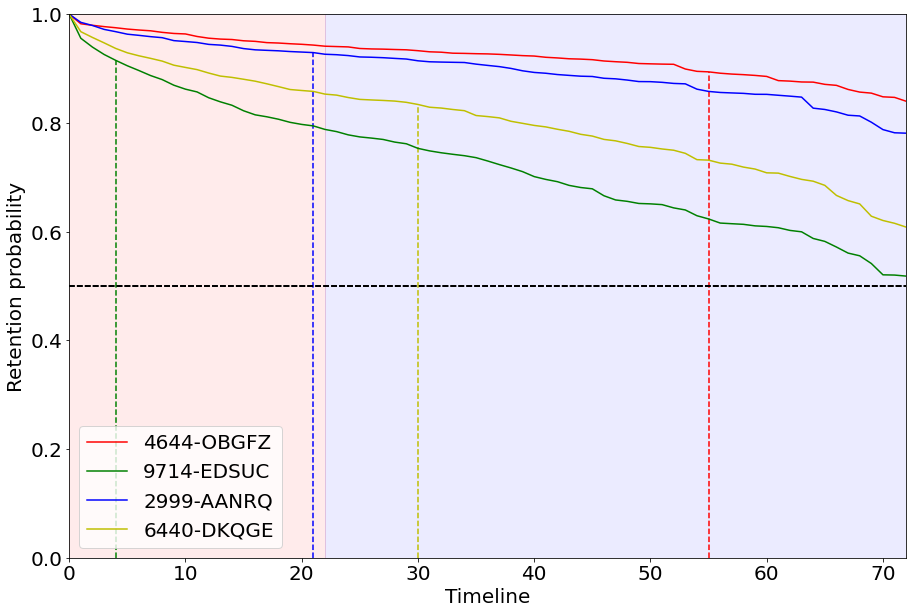

In [99]:
import random

num_of_customers = 4
churned_customers = testing[testing[config.EVENT]==0]
names = random.sample(set(churned_customers.index),num_of_customers)
X_churned = churned_customers.loc[names].drop([config.TIMELINE,config.EVENT],axis=1).values
T_churned = churned_customers.loc[names][config.TIMELINE].values
E_churned = churned_customers.loc[names][config.EVENT].values

colors = ['r', 'g', 'b', 'y']

fig, ax = plt.subplots()
for i in range(len(names)):
    retention_probability = model.predict_survival(X_churned)
    plt.plot(retention_probability[i],color=colors[i])
    plt.vlines(T_churned[i], 0,retention_probability[i][T_churned[i]], linestyles='--',color=colors[i])
    plt.hlines(0.5, 0,72, colors='k', linestyles='--')
    ax.axvspan(0, 22, alpha=0.02, color='red')
    ax.axvspan(22, 72, alpha=0.02, color='blue')
        

plt.legend(names)
plt.xlabel('Timeline',fontsize=20)
plt.ylabel('Retention probability',fontsize=20)
plt.xlim(0,72)
plt.ylim(0,1)
plt.show()

I see that their retention probabilities at the Tenure times is high compared to the threshold 0.5, which is good.

### Actual and predicted numbers of Customers that churned or not

I will compare the time series of the actual and predicted number of Customers who churned or not on the testing subsample, for each time t. This is done with the helper function 'compare_to_actual'. The parameter 'is_at_risk' is boolean and if it is set to True, it shows the expected number of Customers at risk of churning, and if it's False, it shows the expected number of Customers experiencing the churn.

Expected vs. actual number of customers at risk of churning


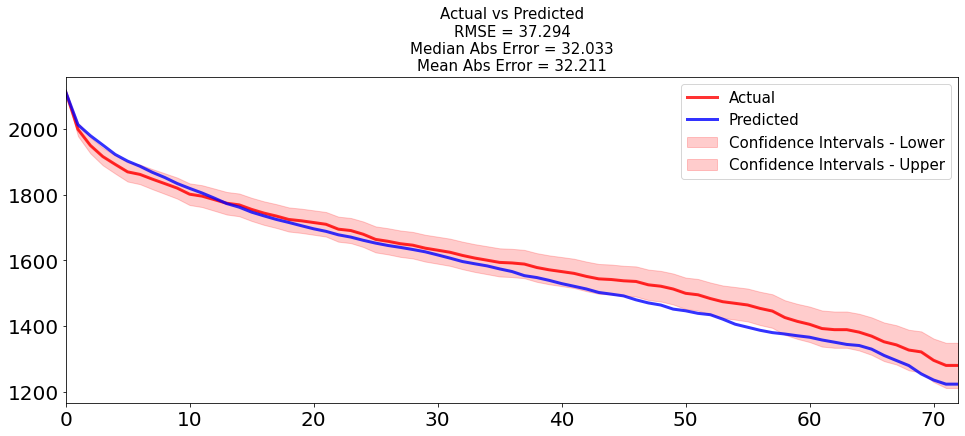

 
Expected vs. actual number of customers that churned


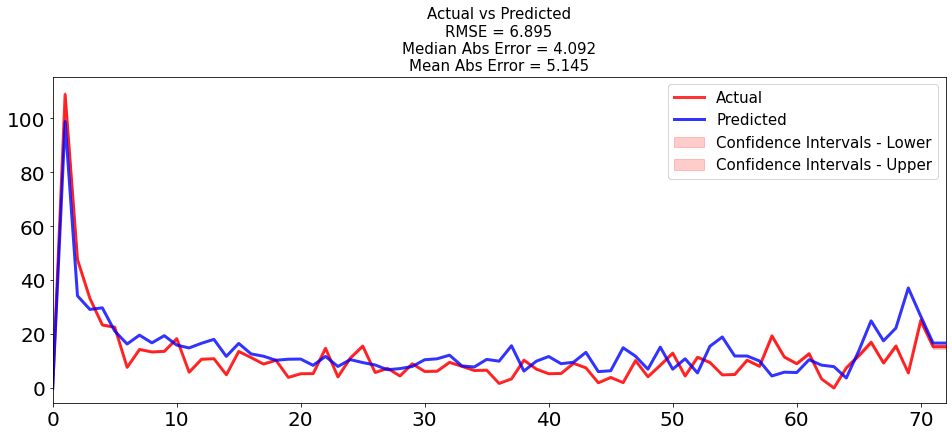

In [100]:
from pysurvival.utils.display import compare_to_actual

print('Expected vs. actual number of customers at risk of churning')
at_risk = compare_to_actual(model, X_test, T_test, E_test,
                            is_at_risk = True,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])
plt.show()
print(' ')
print('Expected vs. actual number of customers that churned')
not_at_risk = compare_to_actual(model, X_test, T_test, E_test,
                                is_at_risk = False,  figure_size=(16, 6),
                                metrics = ['rmse', 'mean', 'median'])
plt.show()

I see in both examples a good agreement between the real and the predictions.

### Calibration curves

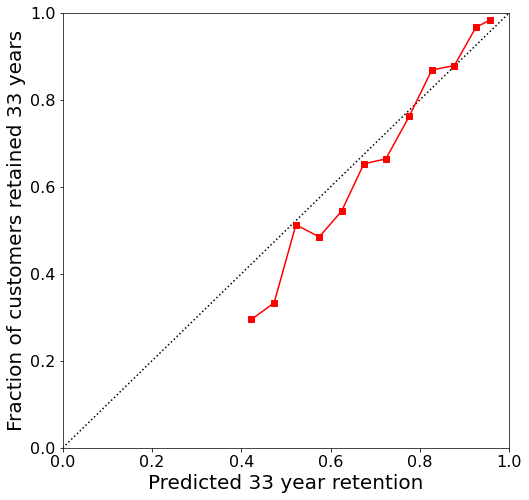

In [101]:
plt.rcParams['figure.figsize'] = (8.0, 8.0) # To set figure sizes for big plots
plt.rcParams['axes.edgecolor'] = "black"

Calibration_Plots(model, testing, config.TIMELINE, config.EVENT, testing[config.TIMELINE].mean())

In [ ]:
I observe on average a good probability calibration as well on the test subsample.